# Bank Marketing

https://archive.ics.uci.edu/dataset/222/bank+marketing

* Introducción

Los datos están relacionados con campañas de marketing directo(llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un deposito a plazo(variable $y$)

`Input Variables. `
* *Bank client data:*

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

* *related with the last contact of the current campaign:*

9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

* *other attributes:*
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

* *Output variable (desired target):*

17. $y$ - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
# Importamos las librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

https://api.rpubs.com/pacoperez/328928

In [2]:
seed=42

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/BankMarkenting/DataSet_BankMarketing/bank/bank-full.csv',sep= ';')
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


vemos que tenemos el caracter 'unknown' en el dataset

In [4]:
# Visualimos las variables y su tipo de datos 
# ===============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* Identificar y eliminar datos duplicados

In [5]:
# Identificar datos duplicados:
# =======================================================================================================
duplicados = df[df.duplicated()]
print(duplicados)


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


Tenemos que nuestro dataset no tiene duplicados.

* Tratar los valores faltantes:eliminar registros o aplicar técnicas de imputación

In [6]:
# Instalamos la librería Missingno
#!pip install missingno

In [7]:
import missingno

In [8]:
def report_missings(data):
    
    porc_valores_perdidos = round((data.isnull().sum(axis=0).sort_values(ascending=False)/len(data))*3,ndigits=3)
    cant_valores_perdidos = data.isnull().sum(axis=0).sort_values(ascending= False)
    df_valores_perdidos = pd.concat([cant_valores_perdidos,porc_valores_perdidos],axis = 'columns').reset_index()
    df_valores_perdidos.columns = ['Variables','Cant. Nulos','% Nulos']
    df_valores_perdidos['Cant. No Nulos'] = len(data) - df_valores_perdidos['Cant. Nulos']
    
    print('='*100)
    print('*'*32,'Descripción de Valores Perdidos','*'*32)
    print('='*100)
    print('\n',df_valores_perdidos,'\n')
    
    import seaborn as sns
    df_perd = pd.DataFrame(df_valores_perdidos,columns=['Variables','cant_nulos','porc_nulos','cant_no_nulos'])
    
    fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols = 2,figsize =(20,8))
    
    sns.barplot(data = df_perd,x='Variables',y='porc_nulos',ax=ax1)
    ax1.set_ylabel('Porcentaje de datos faltantes(%)')
    ax1.set_ylim(0,100)
    ax1.set_title('Porcentaje de datos faltantes por variables',fontweight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation= 45)

    
    sns.heatmap(data= data.isnull().T,ax=ax2,cmap='viridis')
    ax2.set_title('Distribución de valores perdidos',fontweight='bold')

    
    import missingno
    missingno.heatmap(data,ax = ax3,cmap='cividis',vmin=0,fontsize = 12)
    ax3.set_title('Correlación de nulidad entre variables',fontweight='bold')
    
    missingno.dendrogram(data,ax=ax4,fontsize = 12)
    ax4.set_title('Dendograma basado en la correlación de valores faltantes',fontweight='bold')
    #ax4.set_ylim([0, 1.1])
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

******************************** Descripción de Valores Perdidos ********************************

     Variables  Cant. Nulos  % Nulos  Cant. No Nulos
0         age            0      0.0           45211
1         day            0      0.0           45211
2    poutcome            0      0.0           45211
3    previous            0      0.0           45211
4       pdays            0      0.0           45211
5    campaign            0      0.0           45211
6    duration            0      0.0           45211
7       month            0      0.0           45211
8     contact            0      0.0           45211
9         job            0      0.0           45211
10       loan            0      0.0           45211
11    housing            0      0.0           45211
12    balance            0      0.0           45211
13    default            0      0.0           45211
14  education            0      0.0           45211
15    marital            0      0.0           45211
16          y   

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


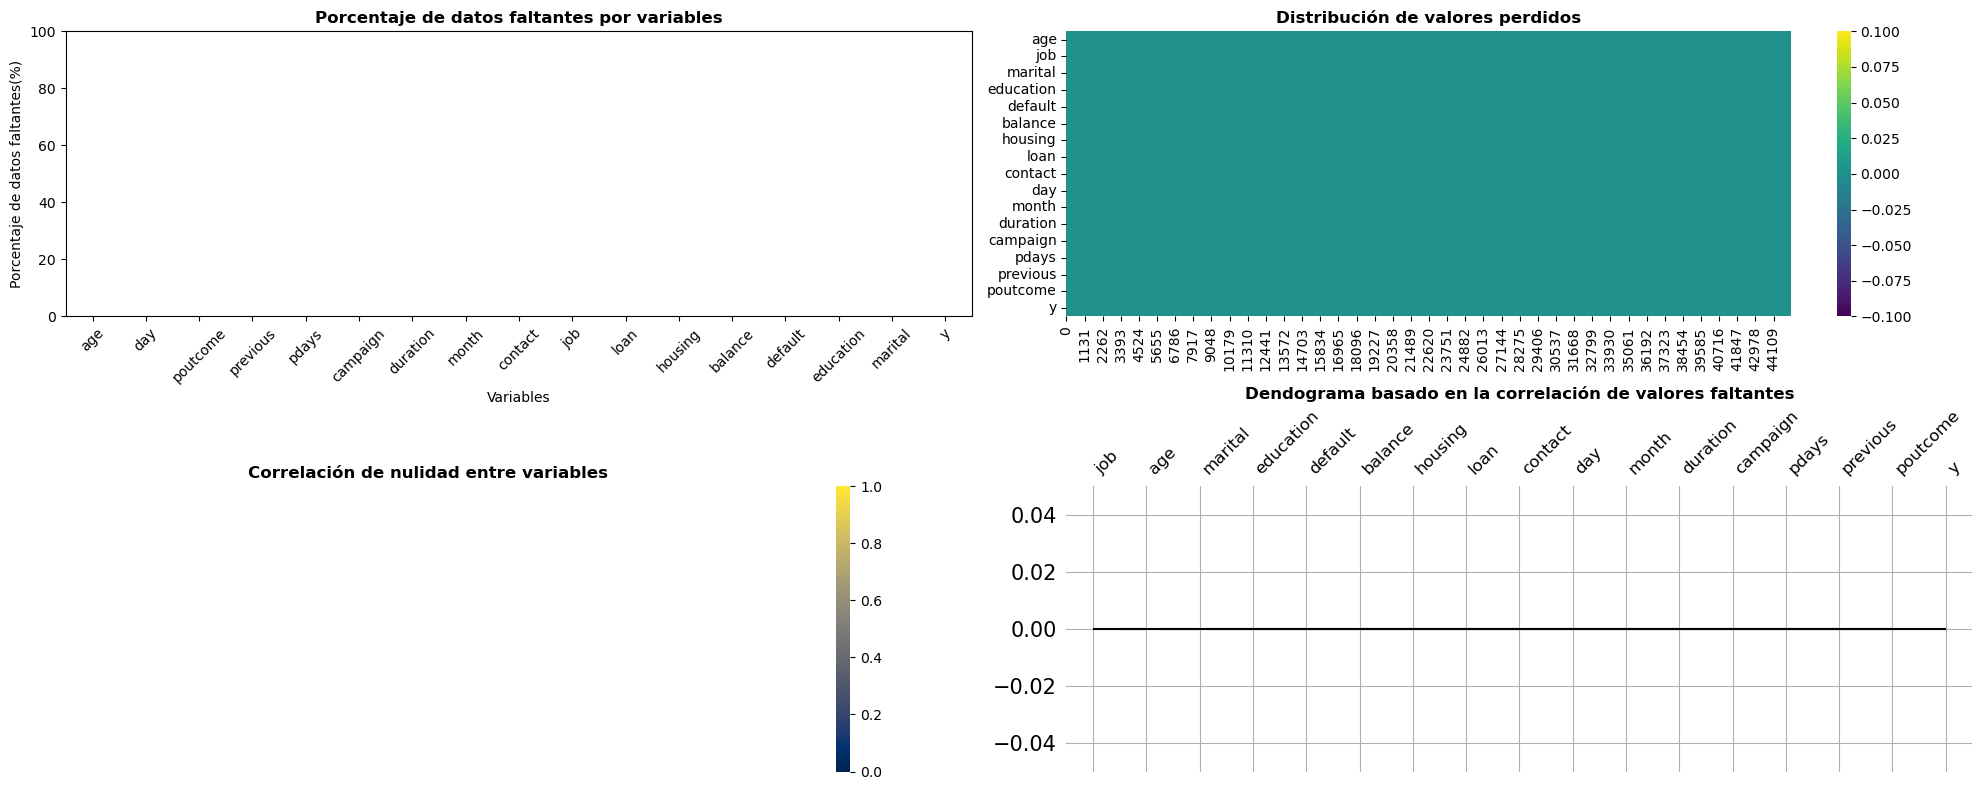

In [9]:
report_missings(df)

vemos claramente que no tenemos valores perdidos

* seleccionamos a las columnas que tenga a la categoria `unknown`

In [10]:
columns_unknown = df.columns[df[df =='unknown'].any()].tolist()
columns_unknown

['job', 'education', 'contact', 'poutcome']

* Resumen estadístico

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [12]:
variables_categoricas = df.select_dtypes(exclude='number').columns.values
print(variables_categoricas)
print(len(variables_categoricas))

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']
10


In [13]:
variables_numericas = df.select_dtypes(include='number').columns.values
print(variables_numericas)
print(len(variables_numericas))

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
7


* Analisis univariado

# Variables Categoricas

1.- job

In [14]:
df_job= df['job'].value_counts(normalize=True)*100
df_job = df_job.reset_index(name = 'Frecuencia relativa')
df_job

,job,Frecuencia relativa
0,blue-collar,21.525735
1,management,20.919688
2,technician,16.803433
3,admin.,11.437482
4,services,9.188029
5,retired,5.007631
6,self-employed,3.492513
7,entrepreneur,3.289023
8,unemployed,2.882042
9,housemaid,2.742695


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


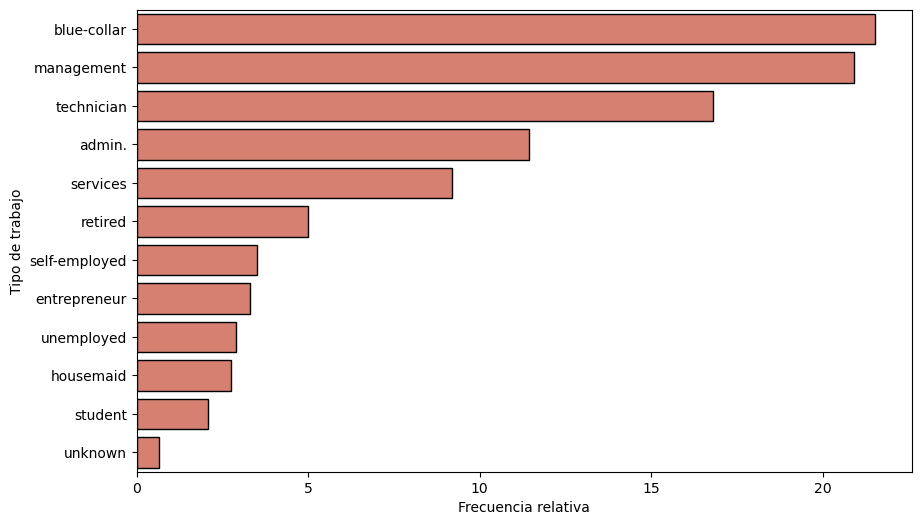

In [15]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_job,y = 'job',x ='Frecuencia relativa',color='#E67460',edgecolor ='black')
plt.ylabel('Tipo de trabajo')
plt.show()

In [16]:
df['job'][(df['job']=='self-employed') | (df['job']=='entrepreneur') | (df['job']=='unemployed') |
          (df['job']=='housemaid') | (df['job']=='student') | (df['job']=='unknown')] = 'other'

/tmp/ipykernel_16862/3076703249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'][(df['job']=='self-employed') | (df['job']=='entrepreneur') | (df['job']=='unemployed') |


In [17]:
df['job'].unique()

array(['management', 'technician', 'other', 'blue-collar', 'retired',
       'admin.', 'services'], dtype=object)

In [18]:
df_job= df['job'].value_counts(normalize=True)*100
df_job = df_job.reset_index(name = 'Frecuencia relativa')
df_job

,job,Frecuencia relativa
0,blue-collar,21.525735
1,management,20.919688
2,technician,16.803433
3,other,15.118002
4,admin.,11.437482
5,services,9.188029
6,retired,5.007631


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


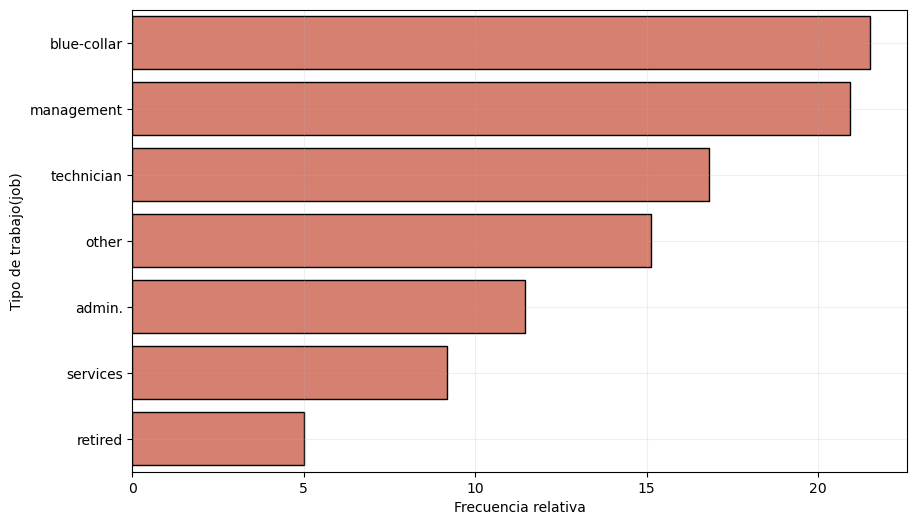

In [19]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_job,y = 'job',x ='Frecuencia relativa',color='#E67460',edgecolor ='black')
plt.ylabel('Tipo de trabajo(job)')
plt.grid(True,alpha=0.2)
plt.show()

2.- marital

In [20]:
df_marital = df['marital'].value_counts(normalize=True)*100
df_marital = df_marital.reset_index(name = 'Frecuencia relativa')
df_marital

,marital,Frecuencia relativa
0,married,60.193316
1,single,28.289576
2,divorced,11.517109


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


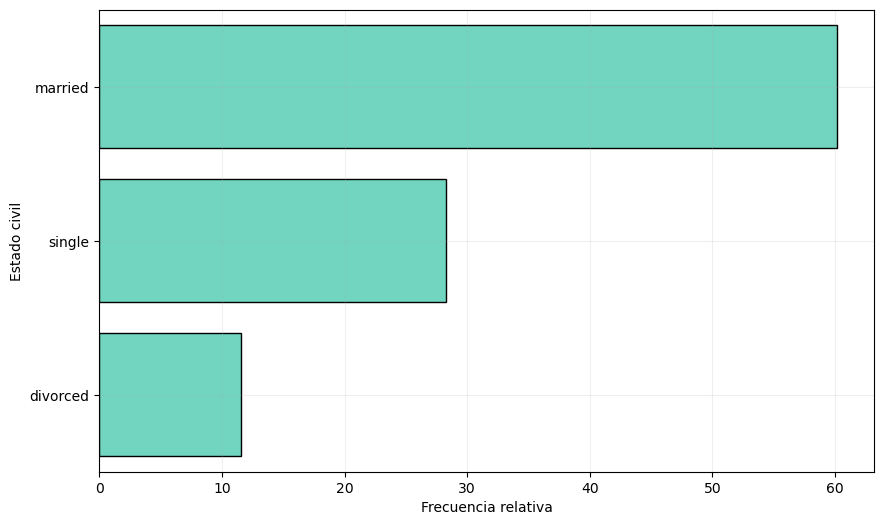

In [21]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_marital,y = 'marital',x ='Frecuencia relativa',color='#60E6C8',edgecolor ='black')
plt.ylabel('Estado civil')
plt.grid(True,alpha=0.2)
plt.show()

3.- education

In [22]:
df_education = df['education'].value_counts(normalize=True)*100
df_education = df_education.reset_index(name = 'Frecuencia relativa')
df_education

,education,Frecuencia relativa
0,secondary,51.319369
1,tertiary,29.419831
2,primary,15.153392
3,unknown,4.107407


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


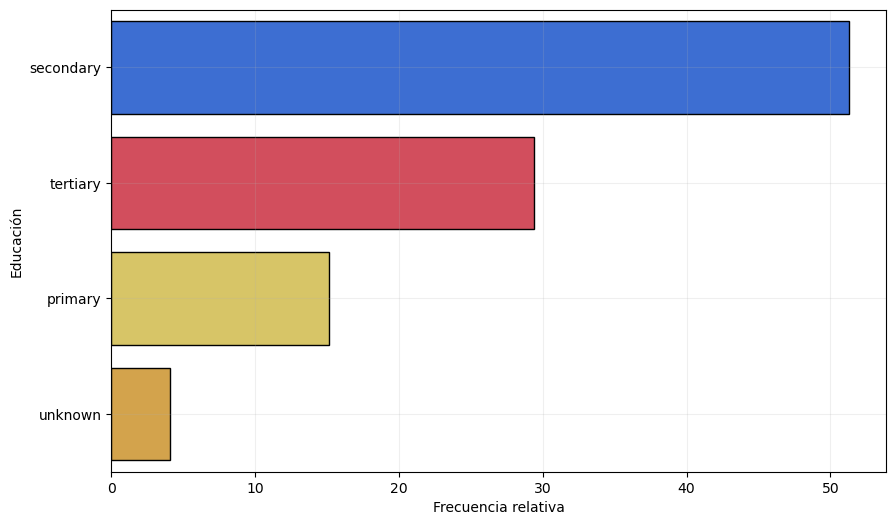

In [23]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_education,y = 'education',x ='Frecuencia relativa',
            palette=['#2466EB','#E8384C','#EAD154','#EAA935'],
            edgecolor ='black')
plt.ylabel('Educación')
plt.grid(True,alpha=0.2)
plt.show()

In [24]:
df['education'][df['education'] == 'unknown'] = 'secondary'

/tmp/ipykernel_16862/321880770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'][df['education'] == 'unknown'] = 'secondary'


In [25]:
df_education = df['education'].value_counts(normalize=True)*100
df_education = df_education.reset_index(name = 'Frecuencia relativa')
df_education

,education,Frecuencia relativa
0,secondary,55.426777
1,tertiary,29.419831
2,primary,15.153392


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


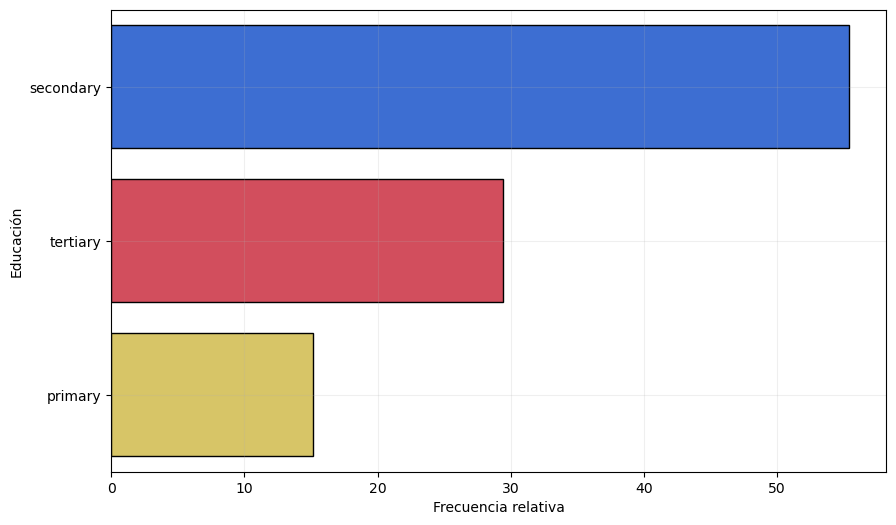

In [26]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_education,y = 'education',x ='Frecuencia relativa',
            palette=['#2466EB','#E8384C','#EAD154'],
            edgecolor ='black')
plt.ylabel('Educación')
plt.grid(True,alpha=0.2)
plt.show()

4.- default

In [27]:
df_default = df['default'].value_counts(normalize=True)*100
df_default = df_default.reset_index(name = 'Frecuencia relativa')
df_default

,default,Frecuencia relativa
0,no,98.197341
1,yes,1.802659


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


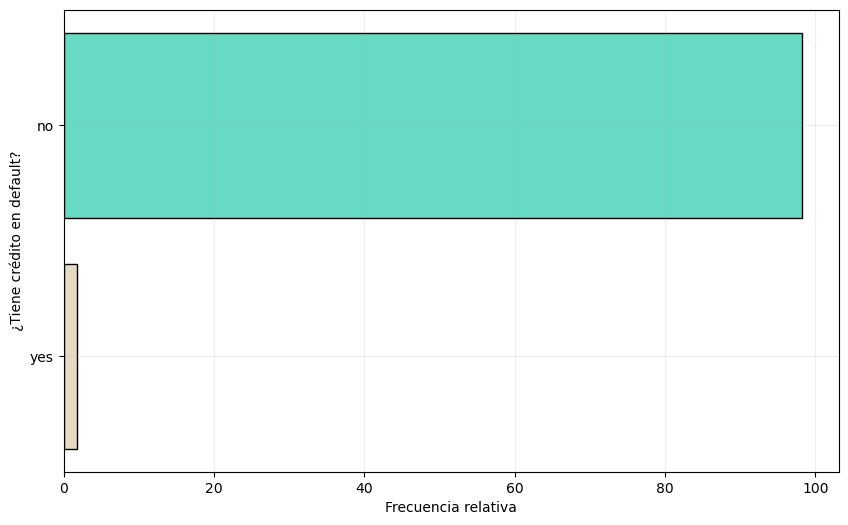

In [28]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_default,y = 'default',x ='Frecuencia relativa',
            palette=['#53EDCF','#EBDEBC'],
            edgecolor ='black')
plt.ylabel('¿Tiene crédito en default?')
plt.grid(True,alpha=0.2)
plt.show()

5.- housing

In [29]:
df_housing = df['housing'].value_counts(normalize=True)*100
df_housing = df_housing.reset_index(name = 'Frecuencia relativa')
df_housing

,housing,Frecuencia relativa
0,yes,55.583818
1,no,44.416182


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


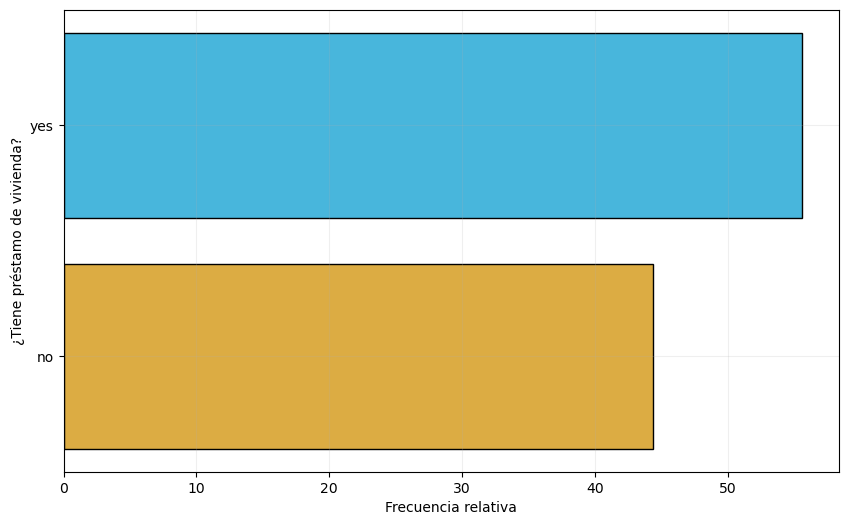

In [30]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_housing,y = 'housing',x ='Frecuencia relativa',
            palette=['#2FC2F5','#F5B62A'],
            edgecolor ='black')
plt.ylabel('¿Tiene préstamo de vivienda?')
plt.grid(True,alpha=0.2)
plt.show()

6.- loan

In [31]:
df_loan = df['loan'].value_counts(normalize=True)*100
df_loan = df_loan.reset_index(name = 'Frecuencia relativa')
df_loan

,loan,Frecuencia relativa
0,no,83.977351
1,yes,16.022649


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


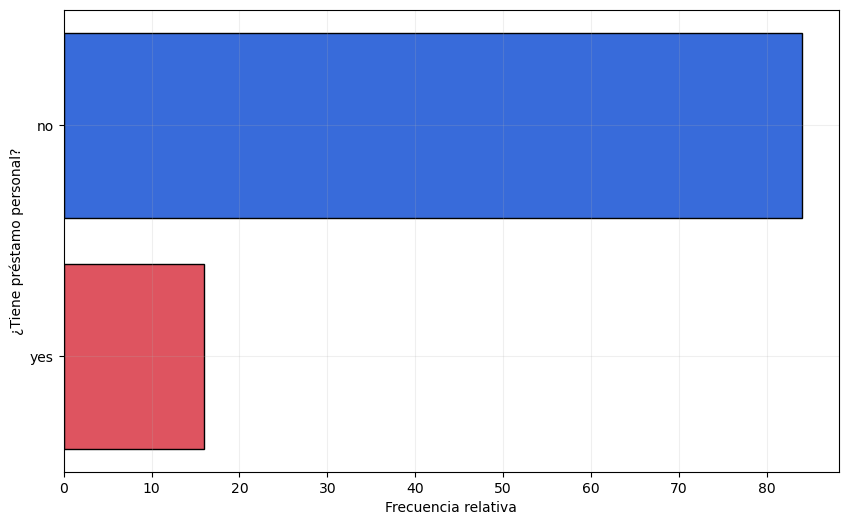

In [32]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_loan,y = 'loan',x ='Frecuencia relativa',
            palette=['#1D61F5','#F53D4D'],
            edgecolor ='black')
plt.ylabel('¿Tiene préstamo personal?')
plt.grid(True,alpha=0.2)
plt.show()

7.- contact

In [33]:
df_contact = df['contact'].value_counts(normalize=True)*100
df_contact = df_contact.reset_index(name = 'Frecuencia relativa')
df_contact

,contact,Frecuencia relativa
0,cellular,64.774059
1,unknown,28.798301
2,telephone,6.427639


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


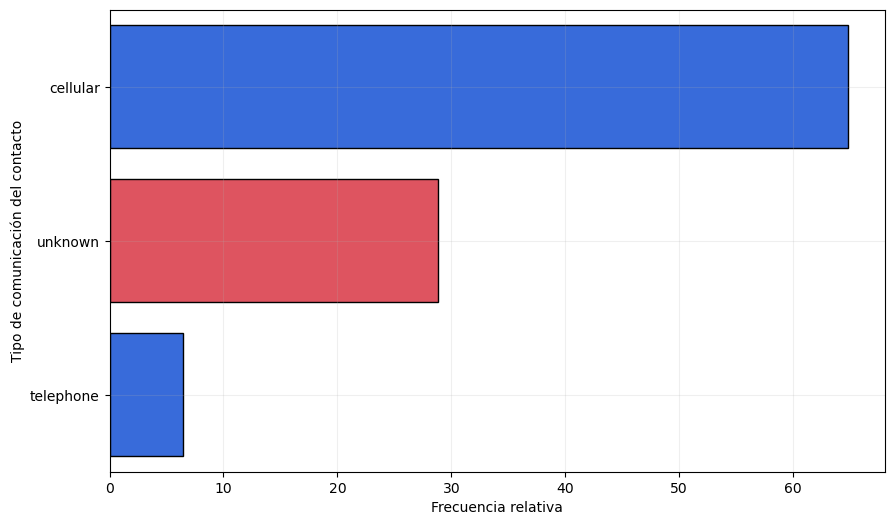

In [34]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_contact,y = 'contact',x ='Frecuencia relativa',
            palette=['#1D61F5','#F53D4D'],
            edgecolor ='black')
plt.ylabel('Tipo de comunicación del contacto')
plt.grid(True,alpha=0.2)
plt.show()

8.- month

In [35]:
df_month = df['month'].value_counts(normalize=True)*100
df_month = df_month.reset_index(name = 'Frecuencia relativa')
df_month

,month,Frecuencia relativa
0,may,30.448342
1,jul,15.250713
2,aug,13.817434
3,jun,11.813497
4,nov,8.781049
5,apr,6.485147
6,feb,5.859194
7,jan,3.103227
8,oct,1.632346
9,sep,1.280662


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


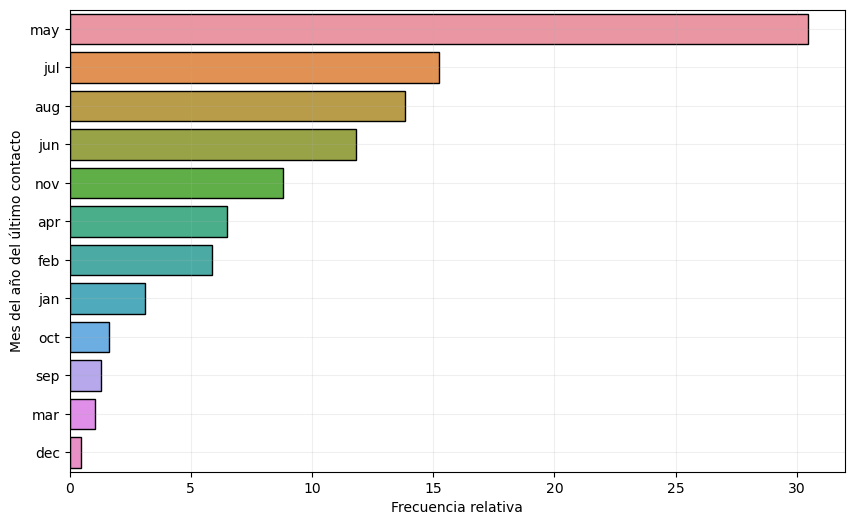

In [36]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_month,y = 'month',x ='Frecuencia relativa',
            #palette=['#1D61F5','#F53D4D'],
            edgecolor ='black')
plt.ylabel('Mes del año del último contacto')
sns.color_palette("bright")
plt.grid(True,alpha=0.2)
plt.show()

creando una nueva variable llamada `Trimestre`

In [37]:
dict_trimestre = {
    'jan':'Trimestre1','feb':'Trimestre1','mar':'Trimestre1',
    'apr':'Trimestre2','may':'Trimestre2','jun':'Trimestre2',
    'jul':'Trimestre3','aug':'Trimestre3','sep':'Trimestre3',
    'oct':'Trimestre4','nov':'Trimestre4','dec':'Trimestre4'
}

In [38]:
df['Trimestre'] = df.month.map(dict_trimestre)

In [39]:
df_trimestre = df['Trimestre'].value_counts(normalize=True)*100
df_trimestre = df_trimestre.reset_index(name = 'Frecuencia relativa')
df_trimestre

,Trimestre,Frecuencia relativa
0,Trimestre2,48.746986
1,Trimestre3,30.348809
2,Trimestre4,10.886731
3,Trimestre1,10.017474


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


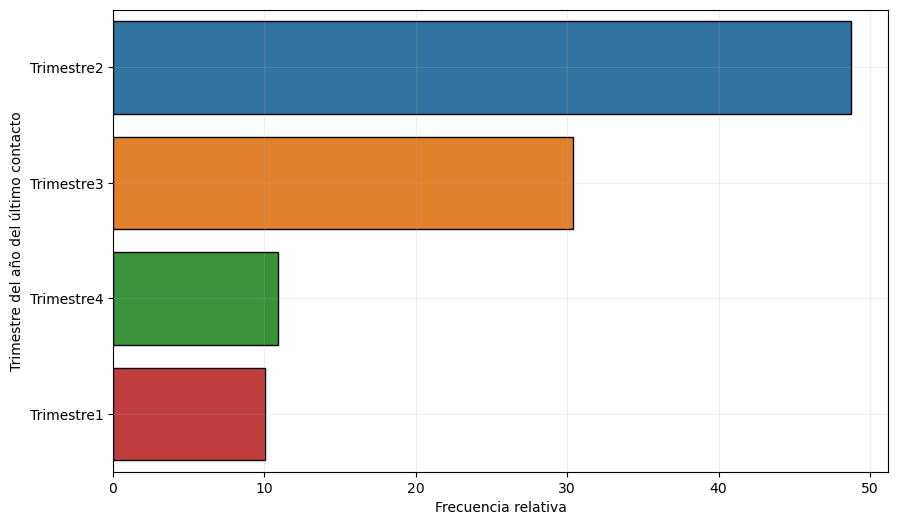

In [40]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_trimestre,y = 'Trimestre',x ='Frecuencia relativa',
            #palette=['#1D61F5','#F53D4D'],
            edgecolor ='black')
plt.ylabel('Trimestre del año del último contacto')
sns.color_palette("bright")
plt.grid(True,alpha=0.2)
plt.show()

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


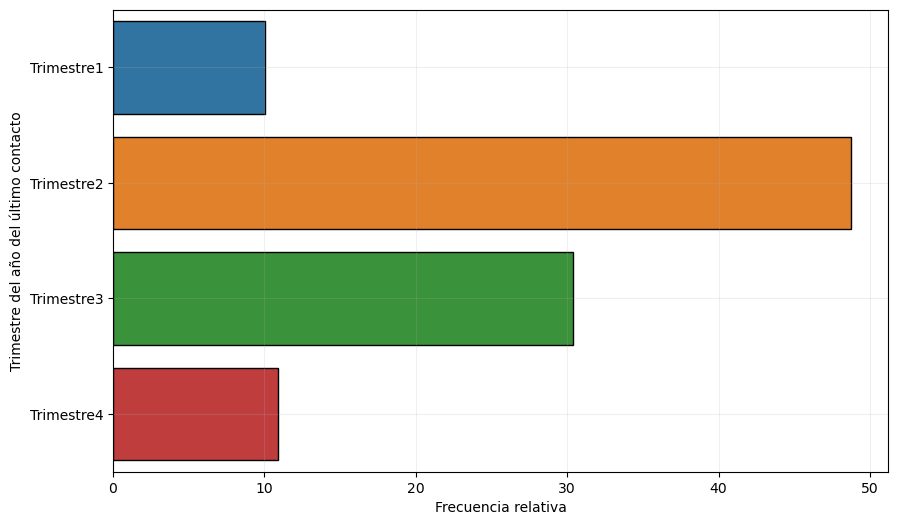

In [41]:
fig, ax = plt.subplots(figsize= (10,6))
# Definir el orden deseado de las etiquetas
orden_etiquetas = ['Trimestre1','Trimestre2','Trimestre3','Trimestre4']
sns.barplot(data=df_trimestre,y = 'Trimestre',x ='Frecuencia relativa',order= orden_etiquetas,
            edgecolor ='black')
plt.ylabel('Trimestre del año del último contacto')
sns.color_palette("bright")
plt.grid(True,alpha=0.2)
plt.show()

9.- poutcome(resultado de la campaña de marketing anterior)

In [42]:
df_poutcome = df['poutcome'].value_counts(normalize=True)*100
df_poutcome = df_poutcome.reset_index(name = 'Frecuencia relativa')
df_poutcome

,poutcome,Frecuencia relativa
0,unknown,81.747805
1,failure,10.840282
2,other,4.069806
3,success,3.342107


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


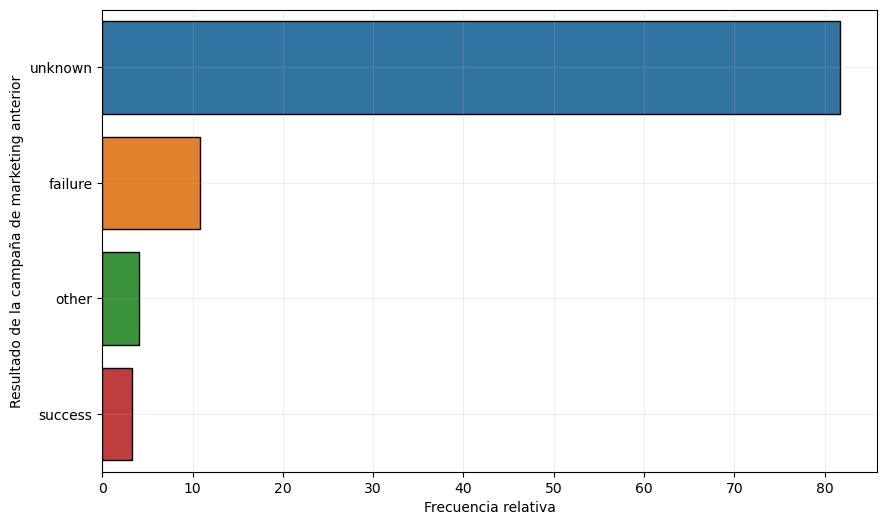

In [43]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_poutcome,y = 'poutcome',x ='Frecuencia relativa',
            edgecolor ='black')
plt.ylabel('Resultado de la campaña de marketing anterior')
sns.color_palette("bright")
plt.grid(True,alpha=0.2)
plt.show()

10.- y - ¿el cliente ha suscrito un depósito a plazo?

In [44]:
df_target = df['y'].value_counts(normalize=True)*100
df_target = df_target.reset_index(name = 'Frecuencia relativa')
df_target

,y,Frecuencia relativa
0,no,88.30152
1,yes,11.69848


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


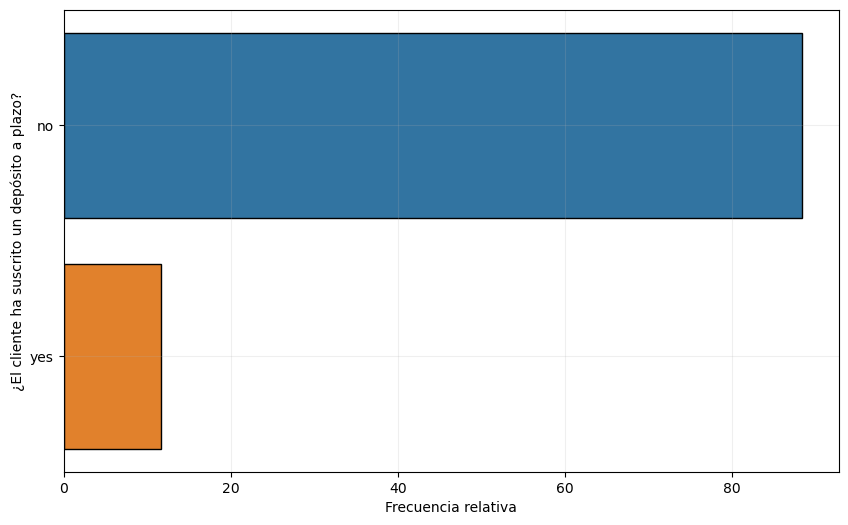

In [45]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data=df_target,y = 'y',x ='Frecuencia relativa',
            edgecolor ='black')
plt.ylabel('¿El cliente ha suscrito un depósito a plazo?')
sns.color_palette("bright")
plt.grid(True,alpha=0.2)
plt.show()

# Variables Numericas

In [46]:
# Regla de Sturges
# ================================================================================================================
nro_intervalos = 1+3.322*np.log10(len(df))
nro_intervalos = int(nro_intervalos)
nro_intervalos

16

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

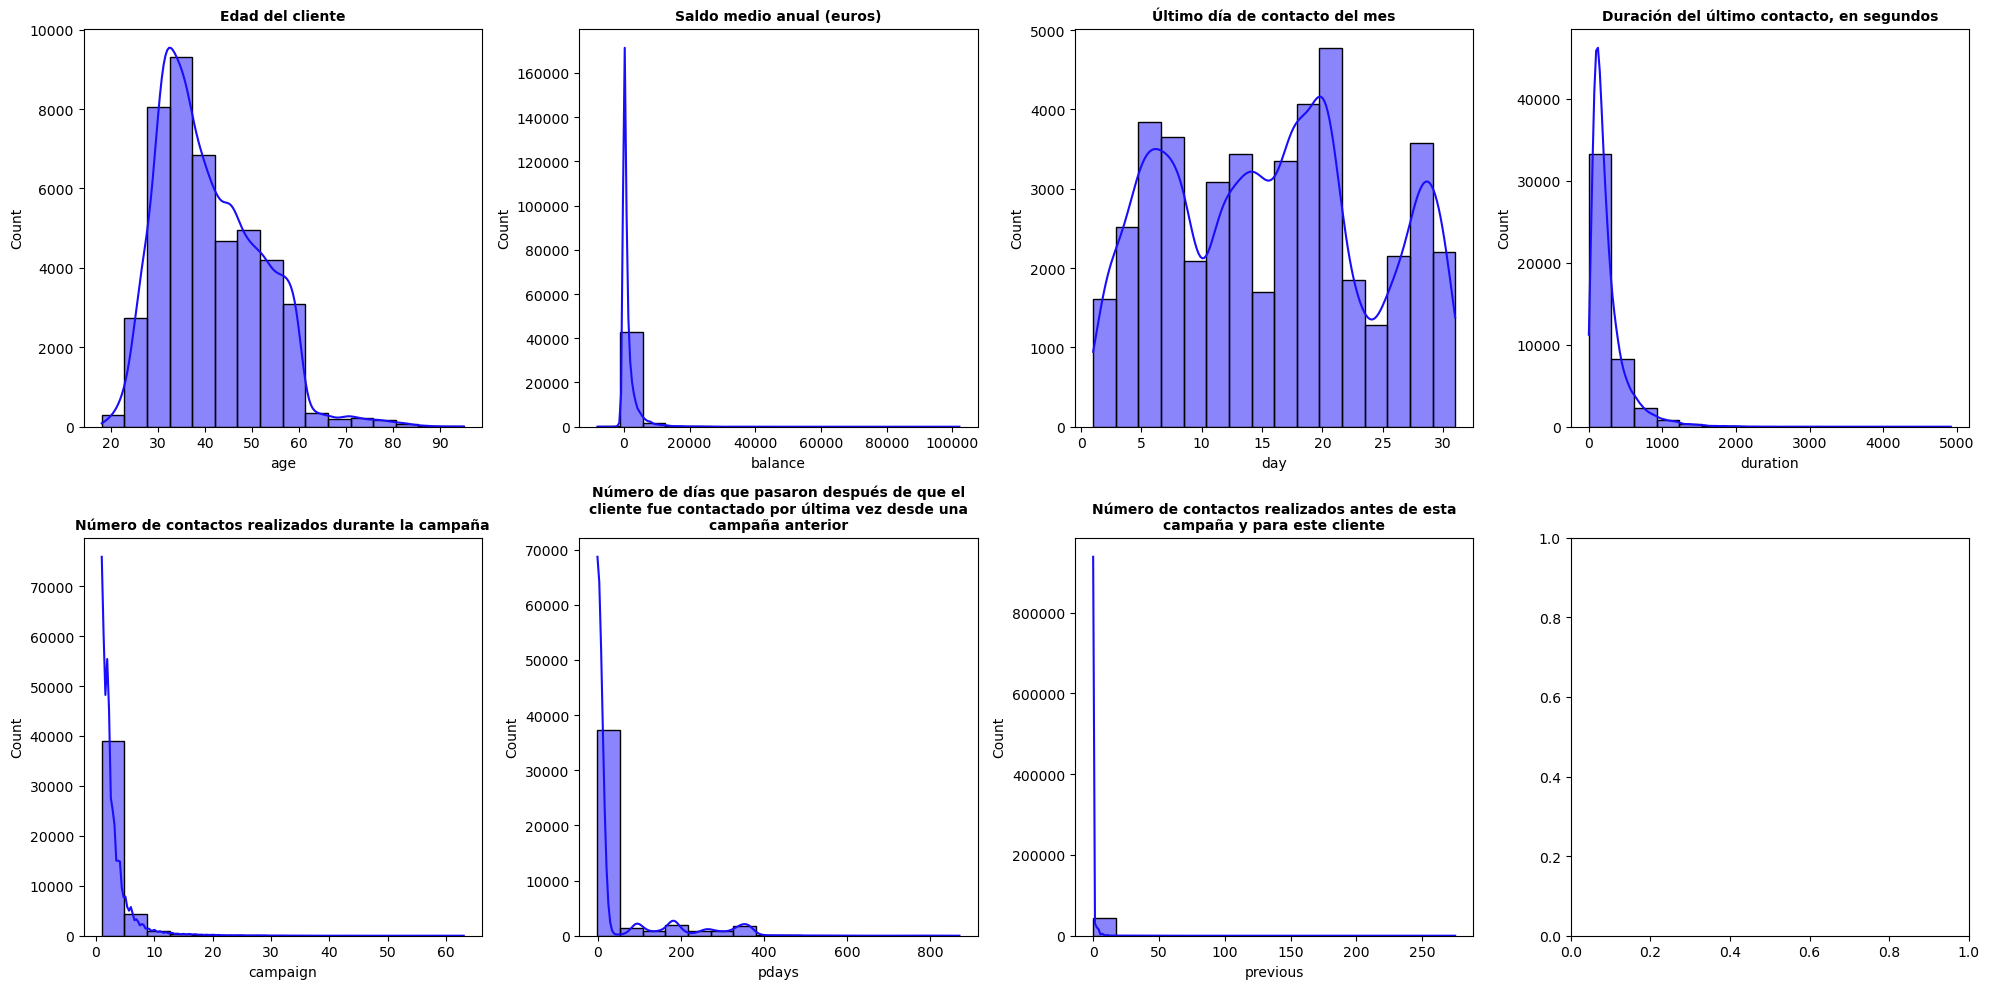

In [47]:
import textwrap

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

titulo = ['Edad del cliente', 'Saldo medio anual (euros)', 'Último día de contacto del mes',
          'Duración del último contacto, en segundos',
          'Número de contactos realizados durante la campaña',
          'Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior',
          'Número de contactos realizados antes de esta campaña y para este cliente']

for i, n in enumerate(variables_numericas):
    sns.histplot(data=df, x=n, ax=axes[i], bins=nro_intervalos,color='#190DFA',kde=True)
    #sns.kdeplot(data=df, x=n, ax=axes[i], color='#7F3EFA', linewidth=1) 
    wrapped_text = "\n".join(textwrap.wrap(titulo[i], width=50))  # Dividir el título en varias líneas
    axes[i].set_title(wrapped_text, fontsize=10,fontweight ='bold')


plt.tight_layout()
plt.show()

Ahora verificamos la existencia de outliers:

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

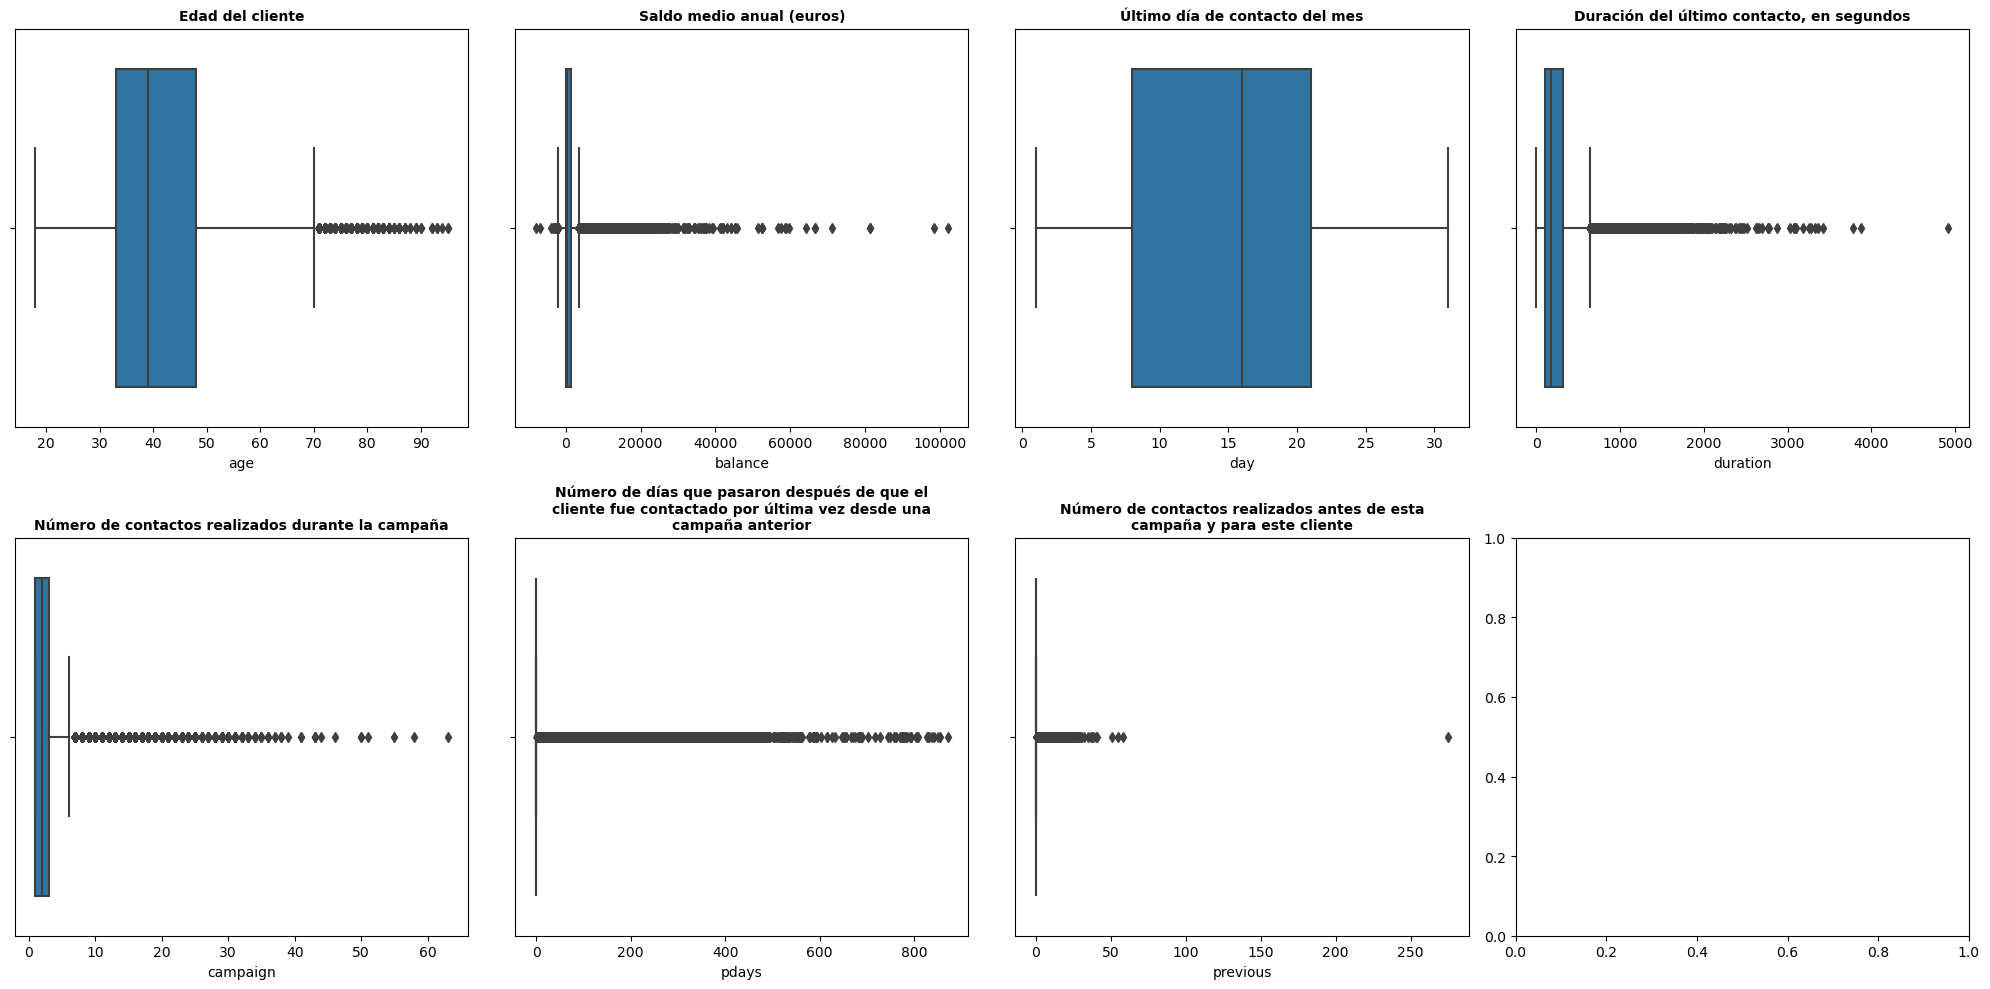

In [48]:
import textwrap

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

titulo = ['Edad del cliente', 'Saldo medio anual (euros)', 'Último día de contacto del mes',
          'Duración del último contacto, en segundos',
          'Número de contactos realizados durante la campaña',
          'Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior',
          'Número de contactos realizados antes de esta campaña y para este cliente']

for i, n in enumerate(variables_numericas):
    sns.boxplot(data=df, x=n, ax=axes[i])
    wrapped_text = "\n".join(textwrap.wrap(titulo[i], width=50))  # Dividir el título en varias líneas
    axes[i].set_title(wrapped_text, fontsize=10,fontweight ='bold')

plt.tight_layout()
plt.show()

vemos una gran presencia de outliers en nuestros datos

In [49]:
# Calula el rango intercuartilico(IQR) para cada columna
# ==============================================================================================================================
Q1 = df[variables_numericas].quantile(0.25)
Q3 = df[variables_numericas].quantile(0.75)
IQR = Q3-Q1
print(f'Rango intercuartilico(IQR):\n{IQR}')

Rango intercuartilico(IQR):
age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [50]:
# Encuentra los valores atípicos para cada columna
# ==============================================================================================================================
outliers = ((df[variables_numericas] < (Q1-1.5*IQR)) | (df[variables_numericas] > (Q3+1.5*IQR)))
outliers_count = outliers.sum()/len(df[variables_numericas])
print('Porcentaje de outliers por cada variable: \n')
print(outliers_count)

Porcentaje de outliers por cada variable: 

age         0.010772
balance     0.104598
day         0.000000
duration    0.071553
campaign    0.067771
pdays       0.182633
previous    0.182633
dtype: float64


In [51]:
df_otl = df.copy()
df_otl.drop(labels='y',axis='columns',inplace=True)
display(df_otl.head(3))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Trimestre
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,Trimestre2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,Trimestre2
2,33,other,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,Trimestre2


In [52]:
from pyod.models.knn import KNN

In [53]:
# Crear un modelo de deteccion de outliers
# ================================================================================================================
detector = KNN(contamination = 0.1)

# Entrenar el modelo
# ================================================================================================================
detector.fit(df_otl[variables_numericas])

# predecir los outliers
# ================================================================================================================
outliers_pred = detector.predict(df_otl[variables_numericas])

In [54]:
df_otl = df[outliers_pred == 0].copy()
df_otl.reset_index(drop=True,inplace=True)
display(df_otl.head(3))
print(df_otl.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Trimestre
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Trimestre2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Trimestre2
2,33,other,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Trimestre2


(41272, 18)


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

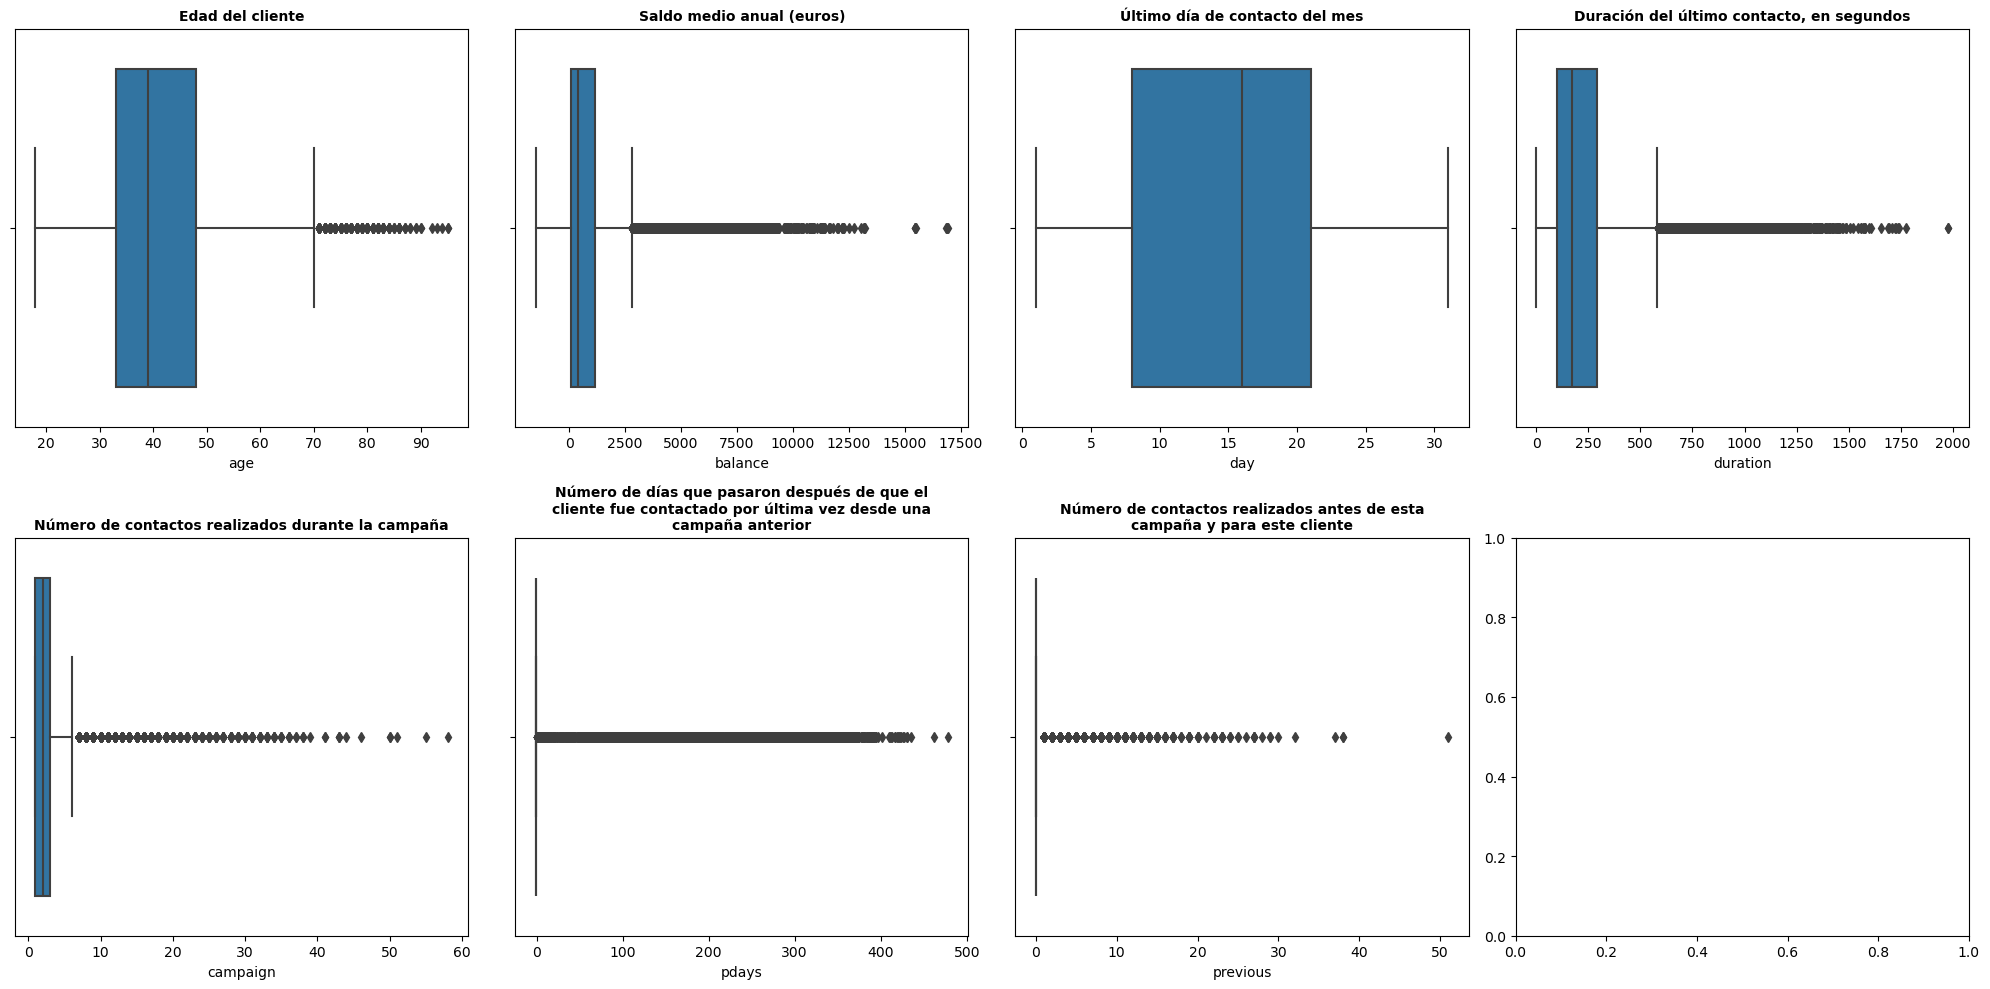

In [55]:
import textwrap

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

titulo = ['Edad del cliente', 'Saldo medio anual (euros)', 'Último día de contacto del mes',
          'Duración del último contacto, en segundos',
          'Número de contactos realizados durante la campaña',
          'Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior',
          'Número de contactos realizados antes de esta campaña y para este cliente']

for i, n in enumerate(variables_numericas):
    sns.boxplot(data=df_otl, x=n, ax=axes[i])
    wrapped_text = "\n".join(textwrap.wrap(titulo[i], width=50))  # Dividir el título en varias líneas
    axes[i].set_title(wrapped_text, fontsize=10,fontweight ='bold')

plt.tight_layout()
plt.show()

In [56]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [57]:
dict_y = {
    'yes':1,
    'no':0
}

In [58]:
df_otl['y'] = df_otl.y.map(dict_y)

In [59]:
variables_numericas_y =['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous','y']

In [60]:

display(df_otl.head(3))
print(df_otl.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Trimestre
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,Trimestre2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,Trimestre2
2,33,other,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,Trimestre2


(41272, 18)


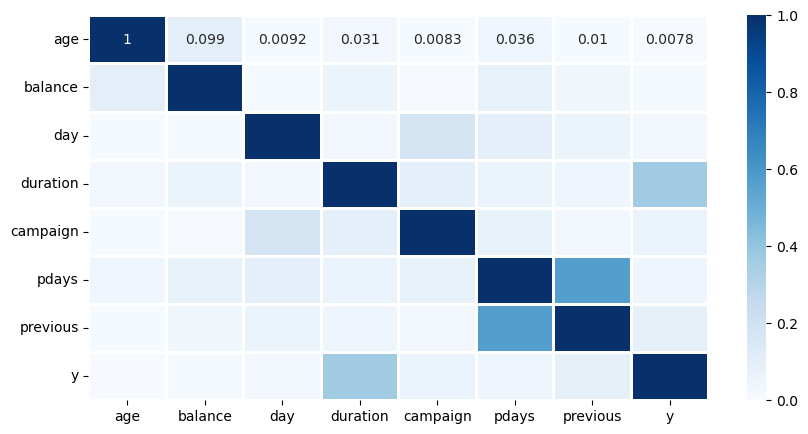

In [61]:
plt.figure(figsize = (10,5))
sns.heatmap(df_otl[variables_numericas_y].corr().abs(),annot = True, linewidths =2,vmin =0,vmax =1,cmap = 'Blues')
plt.show()

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

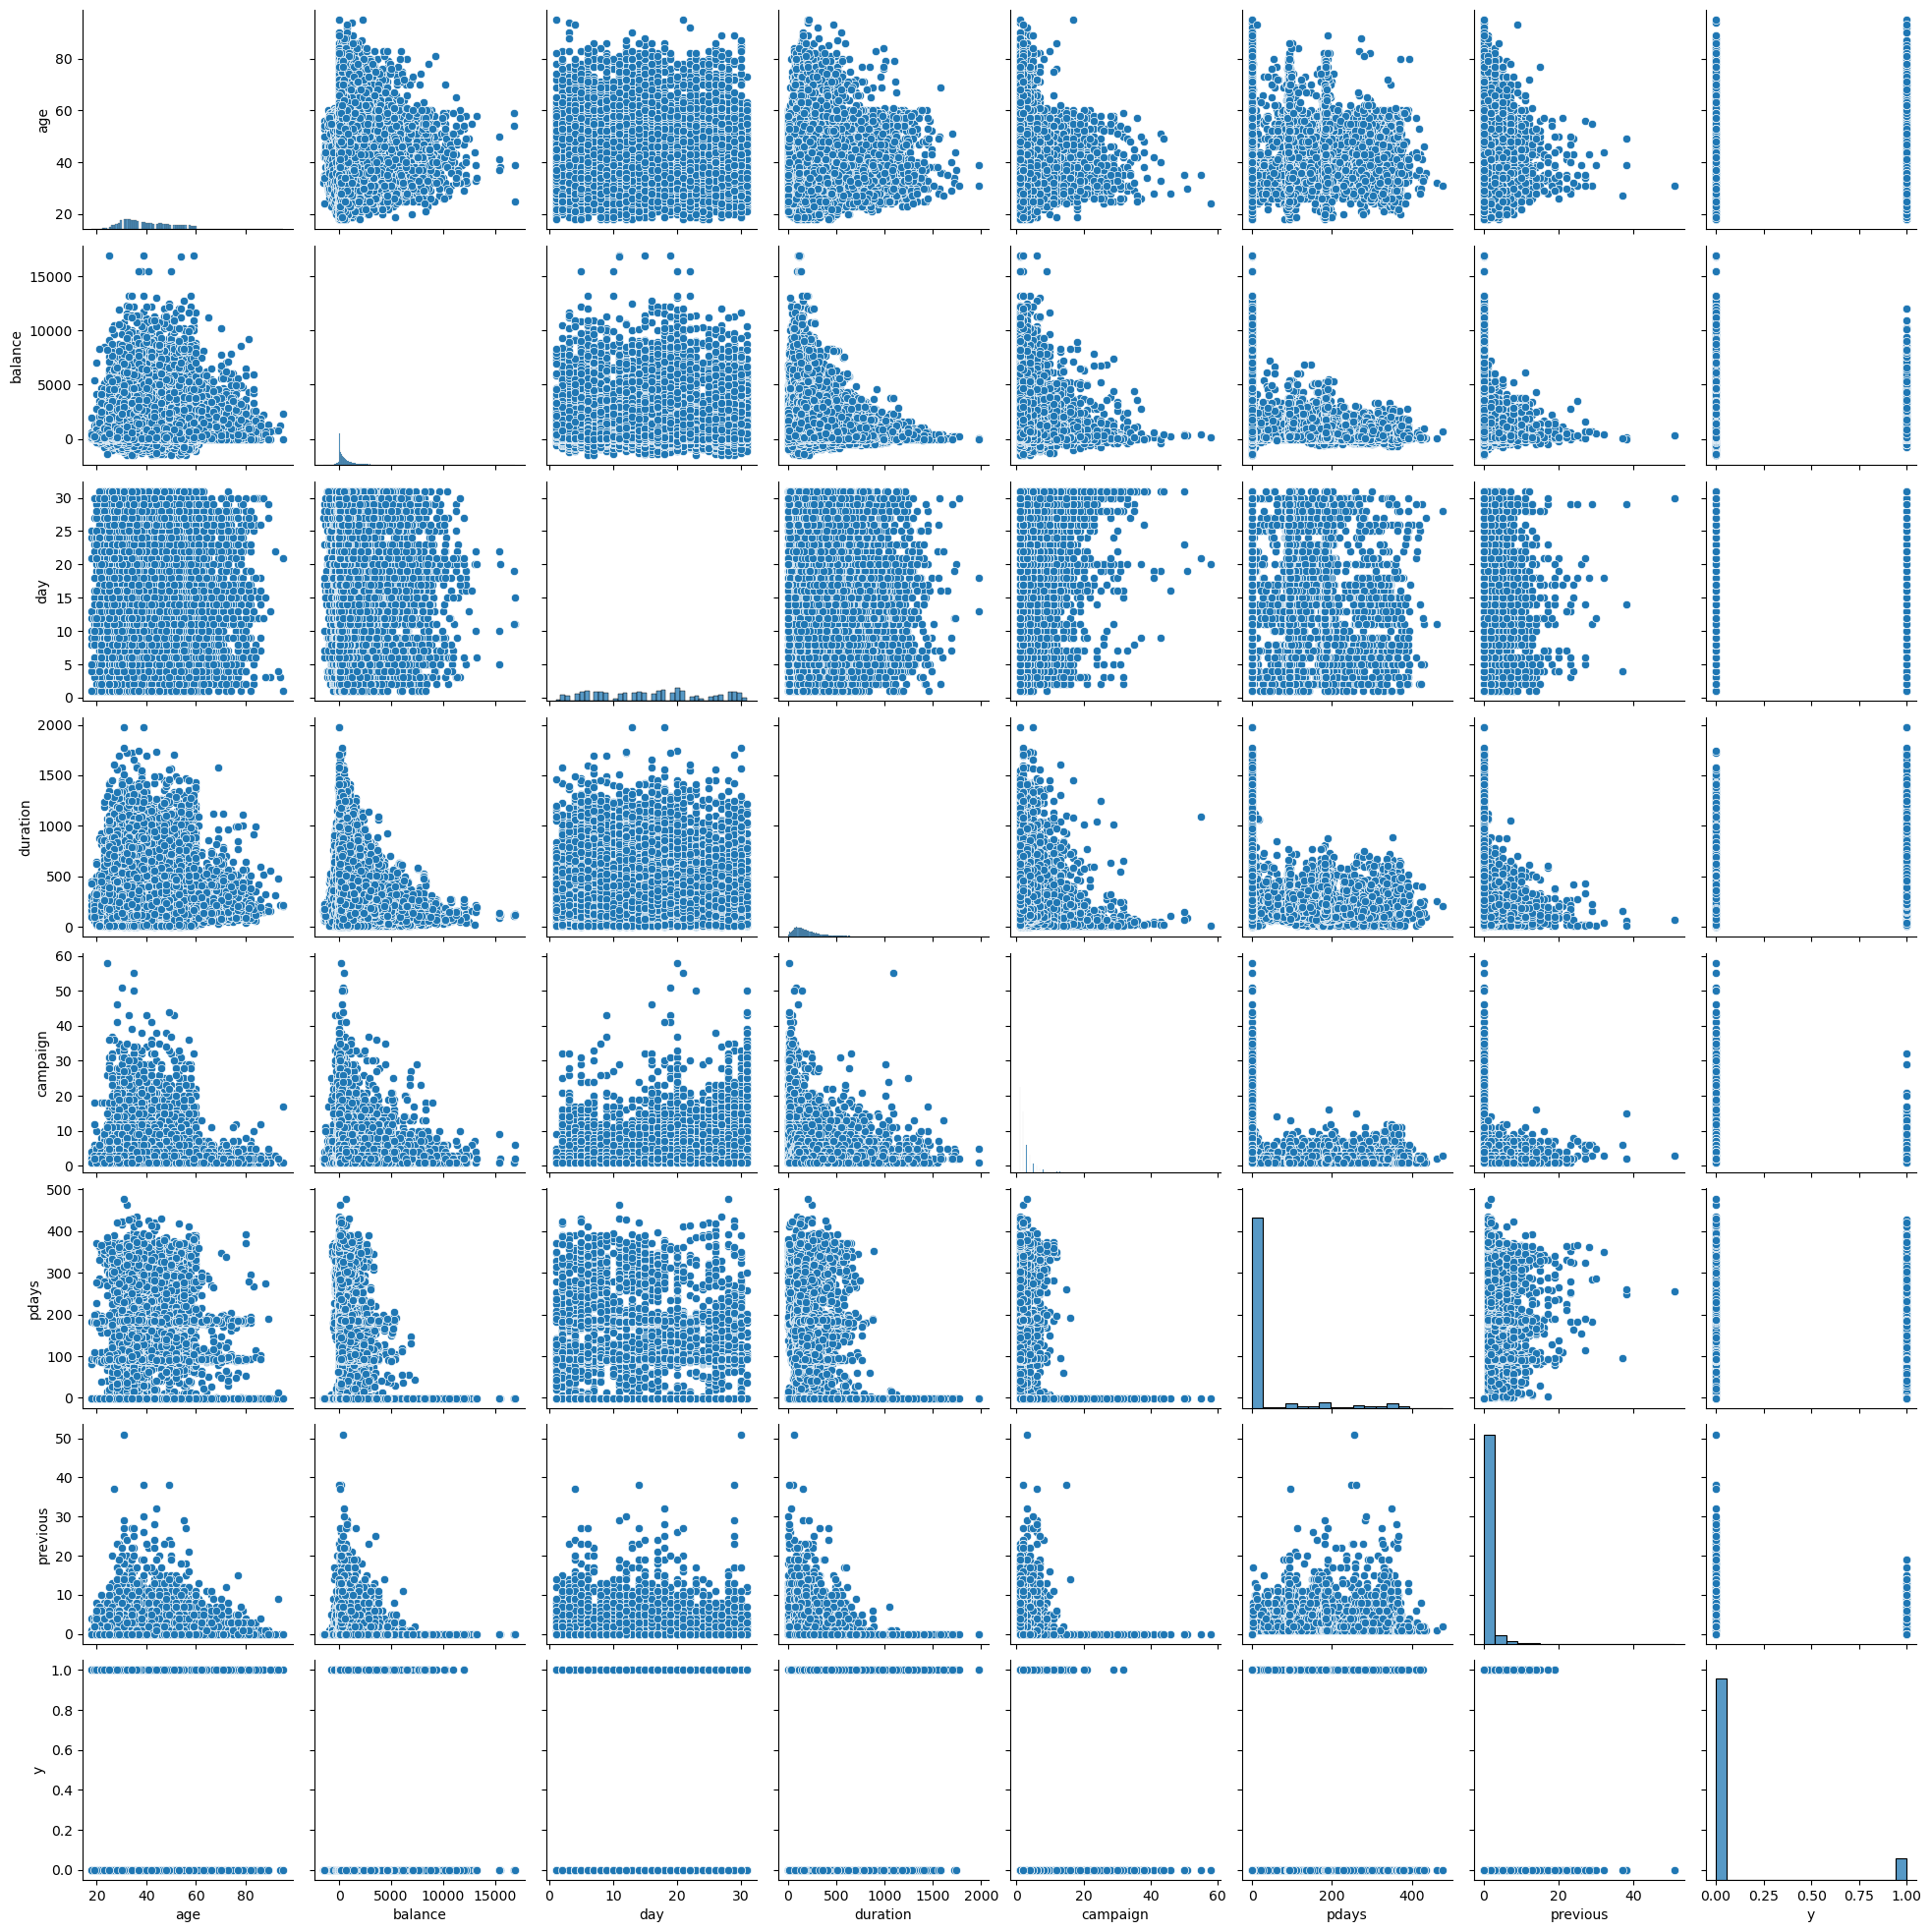

In [62]:
#plt,ax = plt.subplots(figsize=(10,10))
sns.pairplot(data=df_otl)
plt.show()

# Escalamiento y encoding

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder,OneHotEncoder, LabelEncoder,MinMaxScaler, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.manifold import TSNE

In [64]:
categoricas_onehotencoder = ['marital','education','default','housing','loan','contact','poutcome', 'Trimestre'] #8
categoricas_binaryencoder = ['job','month'] #2
numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] #7

In [65]:
cat_transf_1 = Pipeline(
    steps = [
        ('encoder',OneHotEncoder(handle_unknown='ignore',drop='first',sparse=False))
    ]
)

cat_transf_2 = Pipeline(
    steps = [
        ('encoder',BinaryEncoder())
    ]
)

num_transf_1 = Pipeline(
    steps= [
        ('transformer',PowerTransformer())
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('cat_ohe',cat_transf_1,categoricas_onehotencoder),
    ('cat_be',cat_transf_2,categoricas_binaryencoder),
    ('num_pt',num_transf_1,numericas)
])

pipeline = Pipeline(
    steps = [('preprocessor',preprocessor)]
)

pipe_fit = pipeline.fit(df_otl)

data = pd.DataFrame(pipe_fit.transform(df_otl),columns = pipe_fit.get_feature_names_out().tolist())


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
data.head(3)

,cat_ohe__marital_married,cat_ohe__marital_single,cat_ohe__education_secondary,cat_ohe__education_tertiary,cat_ohe__default_yes,cat_ohe__housing_yes,cat_ohe__loan_yes,cat_ohe__contact_telephone,cat_ohe__contact_unknown,cat_ohe__poutcome_other,...,cat_be__month_1,cat_be__month_2,cat_be__month_3,num_pt__age,num_pt__balance,num_pt__day,num_pt__duration,num_pt__campaign,num_pt__pdays,num_pt__previous
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.506652,0.869482,-1.353491,0.479848,-1.114475,-0.410668,-0.410722
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.446204,-0.519274,-1.353491,-0.176705,-1.114475,-0.410668,-0.410722
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.700352,-0.550947,-1.353491,-0.910903,-1.114475,-0.410668,-0.410722


In [67]:
data.columns

Index(['cat_ohe__marital_married', 'cat_ohe__marital_single',
       'cat_ohe__education_secondary', 'cat_ohe__education_tertiary',
       'cat_ohe__default_yes', 'cat_ohe__housing_yes', 'cat_ohe__loan_yes',
       'cat_ohe__contact_telephone', 'cat_ohe__contact_unknown',
       'cat_ohe__poutcome_other', 'cat_ohe__poutcome_success',
       'cat_ohe__poutcome_unknown', 'cat_ohe__Trimestre_Trimestre2',
       'cat_ohe__Trimestre_Trimestre3', 'cat_ohe__Trimestre_Trimestre4',
       'cat_be__job_0', 'cat_be__job_1', 'cat_be__job_2', 'cat_be__month_0',
       'cat_be__month_1', 'cat_be__month_2', 'cat_be__month_3', 'num_pt__age',
       'num_pt__balance', 'num_pt__day', 'num_pt__duration',
       'num_pt__campaign', 'num_pt__pdays', 'num_pt__previous'],
      dtype='object')

In [68]:
num_transf = ['num_pt__age','num_pt__balance', 'num_pt__day', 'num_pt__duration','num_pt__campaign', 'num_pt__pdays', 'num_pt__previous']

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

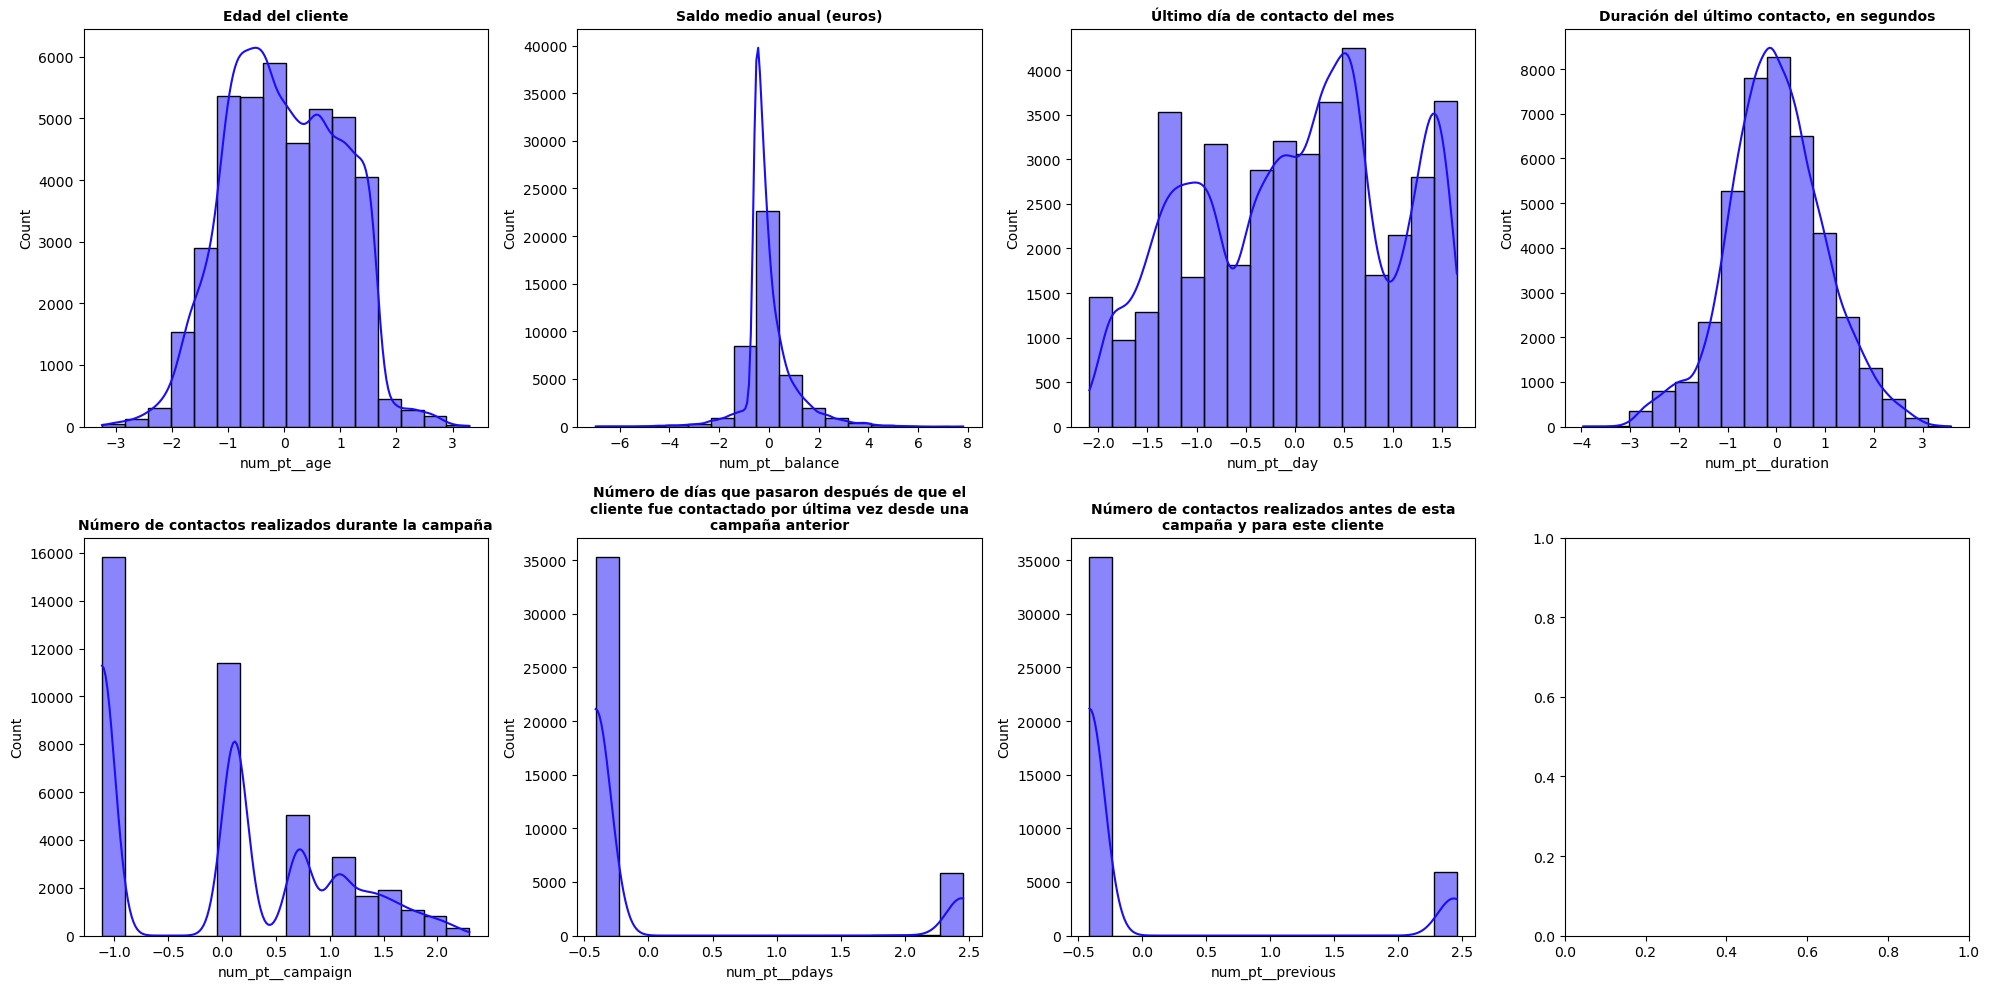

In [69]:
import textwrap

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

titulo = ['Edad del cliente', 'Saldo medio anual (euros)', 'Último día de contacto del mes',
          'Duración del último contacto, en segundos',
          'Número de contactos realizados durante la campaña',
          'Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior',
          'Número de contactos realizados antes de esta campaña y para este cliente']

for i, n in enumerate(num_transf):
    sns.histplot(data=data, x=n, ax=axes[i], bins=nro_intervalos,color='#190DFA',kde=True)
    #sns.kdeplot(data=df, x=n, ax=axes[i], color='#7F3EFA', linewidth=1) 
    wrapped_text = "\n".join(textwrap.wrap(titulo[i], width=50))  # Dividir el título en varias líneas
    axes[i].set_title(wrapped_text, fontsize=10,fontweight ='bold')


plt.tight_layout()
plt.show()

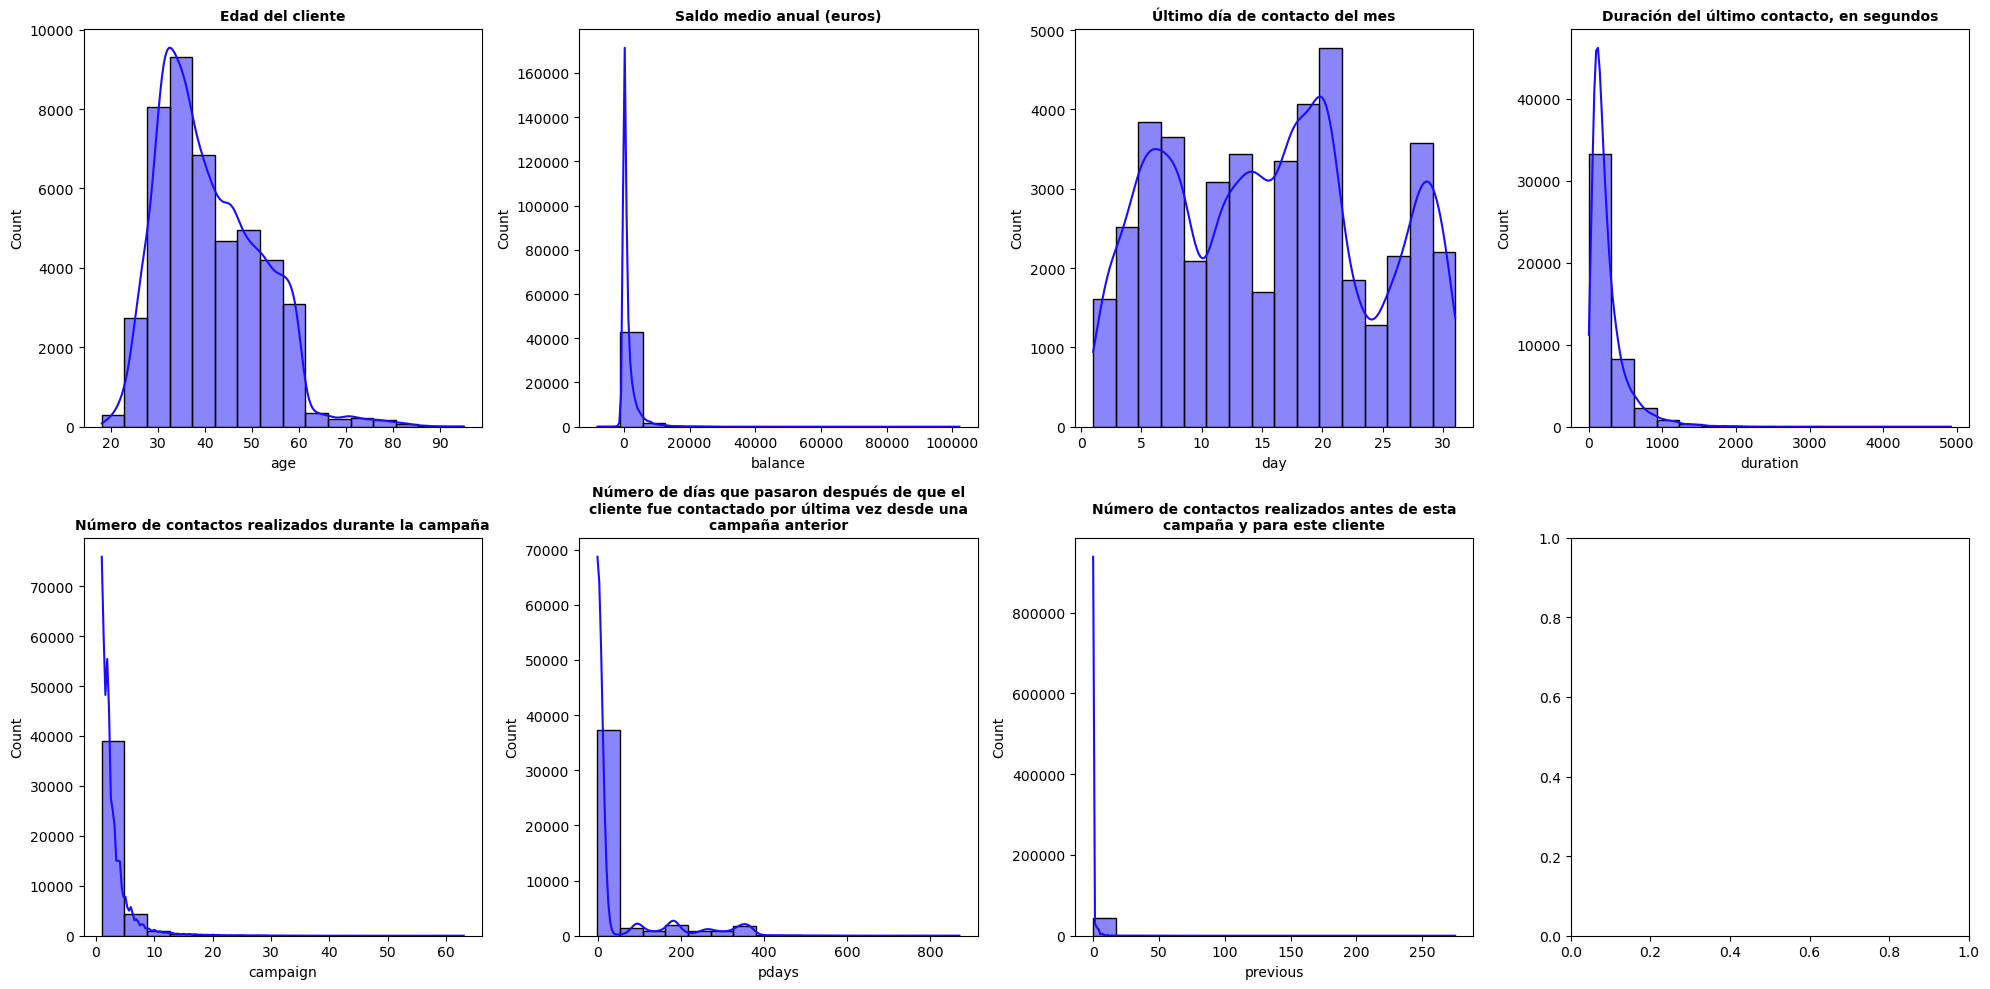

In [70]:
df2 = pd.concat([data,df_otl['y']],axis='columns')

In [71]:
display(df2.head(3))
print(df2.shape)

,cat_ohe__marital_married,cat_ohe__marital_single,cat_ohe__education_secondary,cat_ohe__education_tertiary,cat_ohe__default_yes,cat_ohe__housing_yes,cat_ohe__loan_yes,cat_ohe__contact_telephone,cat_ohe__contact_unknown,cat_ohe__poutcome_other,...,cat_be__month_2,cat_be__month_3,num_pt__age,num_pt__balance,num_pt__day,num_pt__duration,num_pt__campaign,num_pt__pdays,num_pt__previous,y
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.506652,0.869482,-1.353491,0.479848,-1.114475,-0.410668,-0.410722,0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.446204,-0.519274,-1.353491,-0.176705,-1.114475,-0.410668,-0.410722,0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,-0.700352,-0.550947,-1.353491,-0.910903,-1.114475,-0.410668,-0.410722,0


(41272, 30)


In [72]:
X = df2.drop(labels = 'y',axis = 'columns')
y = df2['y']
print('Tamaño de características:',X.shape)
print('Tamaño de variable objetivo: ',y.shape)

Tamaño de características: (41272, 29)
Tamaño de variable objetivo:  (41272,)


In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [74]:
y_train.value_counts(normalize = True)

y
0    0.905019
1    0.094981
Name: proportion, dtype: float64

In [75]:
y_test.value_counts(normalize=True)

y
0    0.905023
1    0.094977
Name: proportion, dtype: float64

In [76]:
# !pip install imblearn

In [77]:
from imblearn.over_sampling import BorderlineSMOTE

In [78]:
from collections import Counter

# Antes de usar Borderline SMOTE, revisa el balance de clases
print("Antes de aplicar Borderline SMOTE:", Counter(y_train))

Antes de aplicar Borderline SMOTE: Counter({0: 26146, 1: 2744})


In [79]:
# Crear una instancia de Borderline SMOTE
# =======================================================================================================================================================
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

# Aplicar Borderline SMOTE al conjunto de datos
# =======================================================================================================================================================
X_train_r, y_train_r = borderline_smote.fit_resample(X_train, y_train)

In [80]:
# Después de usar Borderline SMOTE, revisa nuevamente el balance de clases
print("Después de aplicar Borderline SMOTE:", Counter(y_train_r))

Después de aplicar Borderline SMOTE: Counter({1: 26146, 0: 26146})


In [81]:
from xgboost import XGBRFClassifier

In [82]:
xgboost_model = XGBRFClassifier(random_state=42)

In [83]:
params = {
    'n_estimators': [100,150,200],#epresenta el número de árboles en el bosque.
    'colsample_bytree': [0.6, 1.0], #Proporción de características a utilizar en cada árbol (muestreo de columnas)
    
    'max_depth':[5,10,15],# Controla la profundidad máxima de cada árbol en el bosque
    'min_child_weight':[15,20],
    'reg_alpha': [0, 5, 20, 30],# Término de regularización L1 (Lasso)
    'reg_lambda': [0, 10, 20, 30] # Término de regularización L2 (Ridge)
}

In [84]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [86]:
%%time
# Creando un objeto GridSearchCV para buscar los mejores hiperparámetros
# ===================================================================================================================

gridsearch_xgboost = GridSearchCV(
    xgboost_model,
    param_grid = params,
    scoring = ["f1", "recall"],
    refit = 'f1',
    cv = 8,
    return_train_score = True,
    n_jobs = -1,
    verbose = 1
)

gridsearch_xgboost.fit(X_train_r,y_train_r)

Fitting 8 folds for each of 576 candidates, totalling 4608 fits


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 1min 34s, sys: 16.3 s, total: 1min 50s
Wall time: 45min 18s


GridSearchCV(cv=8,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 1.0],
                         'max_depth': [5, 10, 15], 'min_child_weight': [15, 20],
                         'n_estimators': [100, 150, 200],
                         'reg_alpha': [0, 5, 20, 30],
                         'reg_lambda': [0, 10, 20, 30]},
             refit='f1', return_train_score=True, scoring=['f1', 'recall'],
             verbose=1)

In [87]:
print(f'Mejores Hiperparámetros: {gridsearch_xgboost.best_params_}')

Mejores Hiperparámetros: {'colsample_bytree': 0.6, 'max_depth': 15, 'min_child_weight': 15, 'n_estimators': 150, 'reg_alpha': 0, 'reg_lambda': 0}


In [88]:
best_model_xgboost = gridsearch_xgboost.best_estimator_
best_model_xgboost

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.6, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=15, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=0, ...)

In [89]:
best_model_xgboost.fit(X_train_r,y_train_r)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.6, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=15, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=0, ...)

In [90]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,auc,roc_curve,RocCurveDisplay,classification_report

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     26146
           1       0.53      0.79      0.63      2744

    accuracy                           0.91     28890
   macro avg       0.75      0.86      0.79     28890
weighted avg       0.93      0.91      0.92     28890



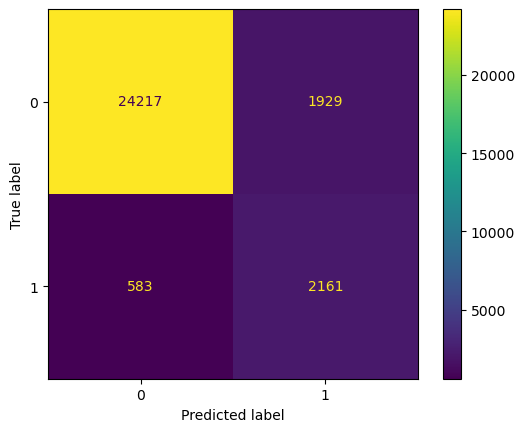

In [91]:
pred_best_xgb_train = best_model_xgboost.predict(X_train)
conf_mat=confusion_matrix(y_train,pred_best_xgb_train)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_train,pred_best_xgb_train))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     11206
           1       0.47      0.72      0.57      1176

    accuracy                           0.90     12382
   macro avg       0.72      0.82      0.76     12382
weighted avg       0.92      0.90      0.91     12382



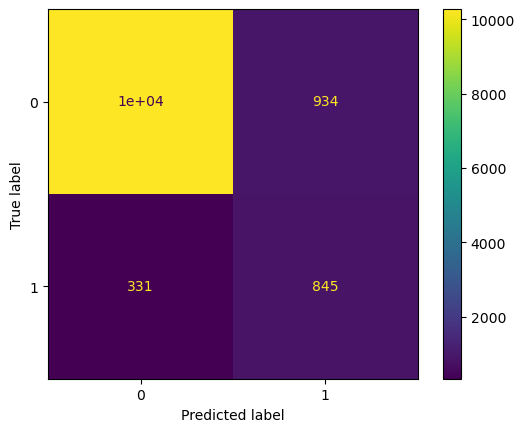

In [92]:
pred_best_xgb_test = best_model_xgboost.predict(X_test)
conf_mat=confusion_matrix(y_test,pred_best_xgb_test)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,pred_best_xgb_test))

In [93]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [94]:
# Crear un objeto Explainer de SHAP con el modelo y los datos de testeo
# =========================================================================
explainer = shap.Explainer(best_model_xgboost, X_test)

[23:04:56] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[23:04:57] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [95]:
# Calcular los valores SHAP para todo el conjunto de datos de entrenamiento
# ==========================================================================
shap_values = explainer.shap_values(X_test)

100%|===================| 12373/12382 [05:45<00:00]        

In [ ]:
variables_import = ['age','marital','balance','housing','loan','contact','duration','campaign','pdays','potcome']

In [5]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

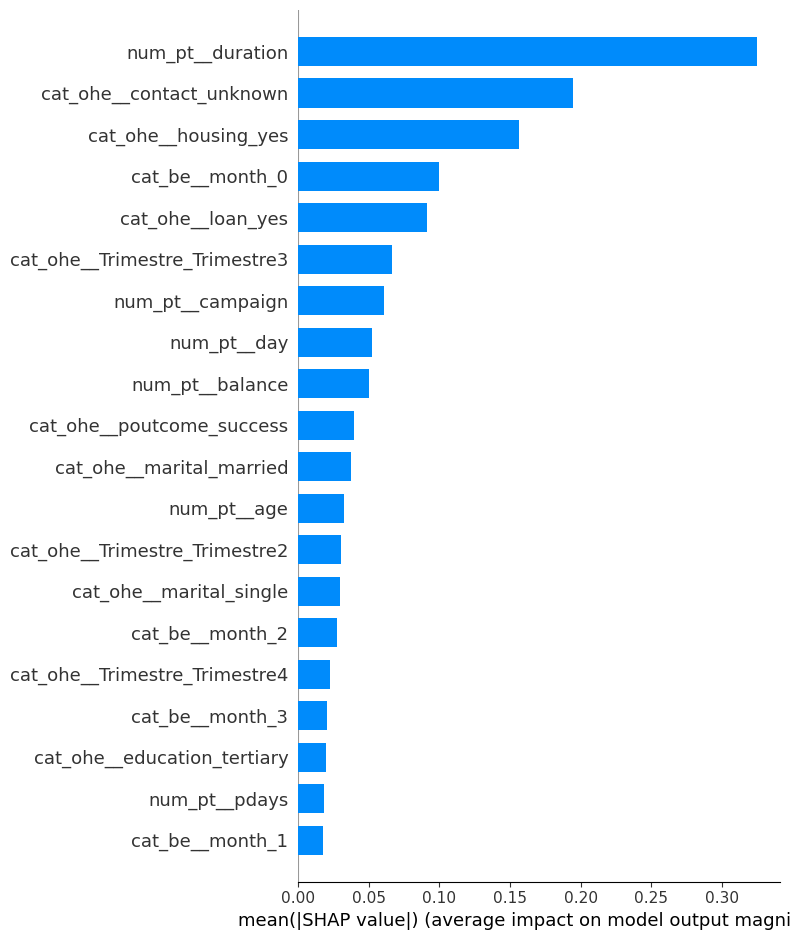

In [96]:
# Mostrar el resumen de las importancias de las variables
# ================================================================================
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Metodo basado en importancia

In [97]:
from sklearn.feature_selection import SelectFromModel

In [98]:
selector = SelectFromModel(best_model_xgboost,threshold=0.025)

In [99]:
# Entrenar el selector y obtener las características seleccionadas
selector.fit(X_train_r, y_train_r)
X_train_selected = selector.transform(X_train_r)
X_test_selected = selector.transform(X_test)

In [115]:
# Obtener las características seleccionadas
feature_indices = selector.get_support(indices=True)
selected_features = X_train_r.columns[feature_indices]

print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['cat_ohe__housing_yes', 'cat_ohe__loan_yes', 'cat_ohe__contact_unknown',
       'cat_ohe__poutcome_success', 'cat_ohe__poutcome_unknown',
       'cat_ohe__Trimestre_Trimestre3', 'cat_ohe__Trimestre_Trimestre4',
       'cat_be__month_0', 'num_pt__duration'],
      dtype='object')


In [100]:
%%time
# Creando un objeto GridSearchCV para buscar los mejores hiperparámetros
# ===================================================================================================================

gridsearch_xgboost = GridSearchCV(
    xgboost_model,
    param_grid = params,
    scoring = ["f1", "recall"],
    refit = 'f1',
    cv = 8,
    return_train_score = True,
    n_jobs = -1,
    verbose = 1
)

gridsearch_xgboost.fit(X_train_selected,y_train_r)

Fitting 8 folds for each of 576 candidates, totalling 4608 fits


CPU times: user 26 s, sys: 2.26 s, total: 28.2 s
Wall time: 16min 8s


GridSearchCV(cv=8,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 1.0],
                         'max_depth': [5, 10, 15], 'min_child_weight': [15, 20],
                         'n_estimators': [100, 150, 200],
                         'reg_alpha': [0, 5, 20, 30],
                         'reg_lambda': [0, 10, 20, 30]},
             refit='f1', return_train_score=True, scoring=['f1', 'recall'],
             verbose=1)

In [101]:
print(f'Mejores Hiperparámetros: {gridsearch_xgboost.best_params_}')

Mejores Hiperparámetros: {'colsample_bytree': 0.6, 'max_depth': 15, 'min_child_weight': 15, 'n_estimators': 100, 'reg_alpha': 5, 'reg_lambda': 0}


In [102]:
best_model_xgboost2 = gridsearch_xgboost.best_estimator_
best_model_xgboost2

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.6, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=15, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=5, ...)

In [103]:
best_model_xgboost2.fit(X_train_selected,y_train_r)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.6, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=15, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=5, ...)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88     26146
           1       0.86      0.92      0.89     26146

    accuracy                           0.88     52292
   macro avg       0.88      0.88      0.88     52292
weighted avg       0.88      0.88      0.88     52292



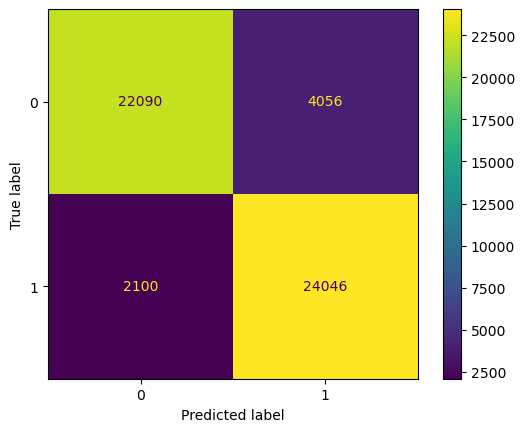

In [106]:
pred_best_xgb_train = best_model_xgboost2.predict(X_train_selected)
conf_mat=confusion_matrix(y_train_r,pred_best_xgb_train)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_train_r,pred_best_xgb_train))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11206
           1       0.34      0.79      0.47      1176

    accuracy                           0.83     12382
   macro avg       0.66      0.81      0.69     12382
weighted avg       0.91      0.83      0.86     12382



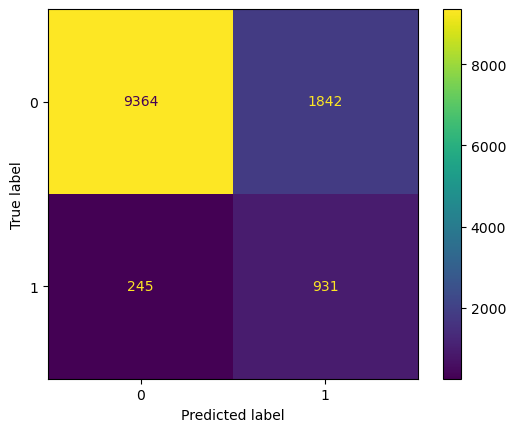

In [108]:
pred_best_xgb_test = best_model_xgboost2.predict(X_test_selected)
conf_mat=confusion_matrix(y_test,pred_best_xgb_test)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,pred_best_xgb_test))

In [109]:
# Crear un objeto Explainer de SHAP con el modelo y los datos de testeo
# =========================================================================
explainer = shap.Explainer(best_model_xgboost2, X_test_selected)

[23:35:20] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [110]:
# Calcular los valores SHAP para todo el conjunto de datos de entrenamiento
# ==========================================================================
shap_values = explainer.shap_values(X_test_selected)

 98%|===================| 12132/12382 [00:58<00:01]        

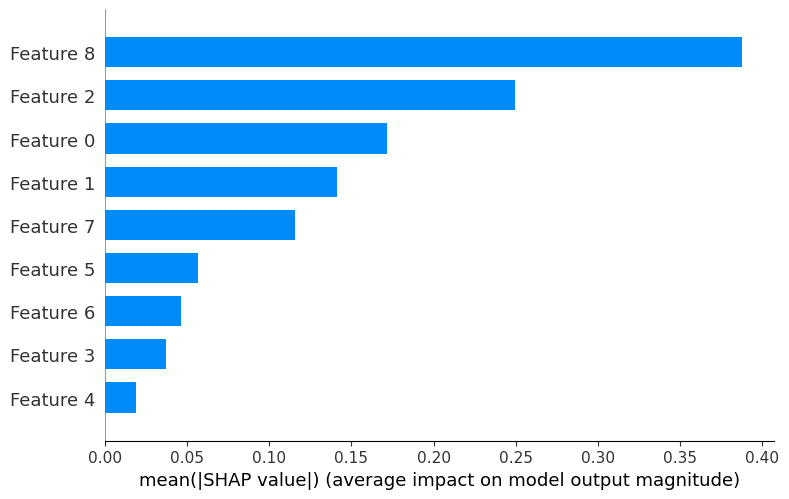

In [111]:
# Mostrar el resumen de las importancias de las variables
# ================================================================================
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")

# variables seleccionadas

In [4]:
variables_import = ['age','marital','balance','housing','loan','contact','duration','campaign','month','pdays','poutcome','y']

In [5]:
df3 = df[variables_import].copy()
df3.head(3)

,age,marital,balance,housing,loan,contact,duration,campaign,month,pdays,poutcome,y
0,58,married,2143,yes,no,unknown,261,1,may,-1,unknown,no
1,44,single,29,yes,no,unknown,151,1,may,-1,unknown,no
2,33,married,2,yes,yes,unknown,76,1,may,-1,unknown,no


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   marital   45211 non-null  object
 2   balance   45211 non-null  int64 
 3   housing   45211 non-null  object
 4   loan      45211 non-null  object
 5   contact   45211 non-null  object
 6   duration  45211 non-null  int64 
 7   campaign  45211 non-null  int64 
 8   month     45211 non-null  object
 9   pdays     45211 non-null  int64 
 10  poutcome  45211 non-null  object
 11  y         45211 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.1+ MB


In [7]:
dict_y = {
    'yes':1,
    'no':0
}

In [8]:
df3['y'] = df3.y.map(dict_y)

In [9]:
dict_trimestre = {
    'jan':'Trimestre1','feb':'Trimestre1','mar':'Trimestre1',
    'apr':'Trimestre2','may':'Trimestre2','jun':'Trimestre2',
    'jul':'Trimestre3','aug':'Trimestre3','sep':'Trimestre3',
    'oct':'Trimestre4','nov':'Trimestre4','dec':'Trimestre4'
}

In [10]:
df3['Trimestre'] = df3.month.map(dict_trimestre)

In [11]:
df3.drop(columns='month',inplace=True)

In [12]:
var_num = ['age','balance','duration','campaign','pdays']

In [13]:
from pyod.models.knn import KNN

In [14]:
detector = KNN(contamination=0.1)
detector.fit(df3[var_num])
outliers_pred = detector.predict(df3[var_num])

In [15]:
df3 = df3[outliers_pred == 0].copy()
df3.reset_index(drop=True,inplace = True)
display(df3.head(3))
print(df3.shape)

,age,marital,balance,housing,loan,contact,duration,campaign,pdays,poutcome,y,Trimestre
0,58,married,2143,yes,no,unknown,261,1,-1,unknown,0,Trimestre2
1,44,single,29,yes,no,unknown,151,1,-1,unknown,0,Trimestre2
2,33,married,2,yes,yes,unknown,76,1,-1,unknown,0,Trimestre2


(41280, 12)


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder,OneHotEncoder, LabelEncoder,MinMaxScaler, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.manifold import TSNE

In [17]:
categoricas_onehotencoder = ['marital','housing','loan','contact','poutcome', 'Trimestre'] #6
number_pt = ['age', 'balance', 'duration'] #7
number_scaled = ['campaign','pdays']


In [18]:
cat_transf_1 = Pipeline(
    steps = [
        ('encoder',OneHotEncoder(handle_unknown='ignore',drop='first',sparse=False))
    ]
)

num_transf_1 = Pipeline(
    steps= [
        ('transformer',PowerTransformer())
    ]
)

num_scaled_1 = Pipeline(
    steps = [
        ('scaled',MinMaxScaler())
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('cat_ohe',cat_transf_1,categoricas_onehotencoder),
    ('num_pt',num_transf_1,number_pt),
    ('num_sc',num_scaled_1,number_scaled)
])

pipeline = Pipeline(
    steps = [('preprocessor',preprocessor)]
)

pipe_fit = pipeline.fit(df3)

data = pd.DataFrame(pipe_fit.transform(df3),columns = pipe_fit.get_feature_names_out().tolist())


/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
data.head(3)

,cat_ohe__marital_married,cat_ohe__marital_single,cat_ohe__housing_yes,cat_ohe__loan_yes,cat_ohe__contact_telephone,cat_ohe__contact_unknown,cat_ohe__poutcome_other,cat_ohe__poutcome_success,cat_ohe__poutcome_unknown,cat_ohe__Trimestre_Trimestre2,cat_ohe__Trimestre_Trimestre3,cat_ohe__Trimestre_Trimestre4,num_pt__age,num_pt__balance,num_pt__duration,num_sc__campaign,num_sc__pdays
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.507132,0.868869,0.479780,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.446524,-0.519282,-0.176699,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.700292,-0.550965,-0.910890,0.0,0.0


In [20]:
df_preprocesing = pd.concat([data,df3['y']],axis='columns')

In [21]:
df_preprocesing.head(3)

,cat_ohe__marital_married,cat_ohe__marital_single,cat_ohe__housing_yes,cat_ohe__loan_yes,cat_ohe__contact_telephone,cat_ohe__contact_unknown,cat_ohe__poutcome_other,cat_ohe__poutcome_success,cat_ohe__poutcome_unknown,cat_ohe__Trimestre_Trimestre2,cat_ohe__Trimestre_Trimestre3,cat_ohe__Trimestre_Trimestre4,num_pt__age,num_pt__balance,num_pt__duration,num_sc__campaign,num_sc__pdays,y
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.507132,0.868869,0.479780,0.0,0.0,0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.446524,-0.519282,-0.176699,0.0,0.0,0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.700292,-0.550965,-0.910890,0.0,0.0,0


In [22]:
X = df_preprocesing.drop(labels = 'y',axis = 'columns')
y = df_preprocesing['y']
print('Tamaño de características:',X.shape)
print('Tamaño de variable objetivo: ',y.shape)

Tamaño de características: (41280, 17)
Tamaño de variable objetivo:  (41280,)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [63]:
from imblearn.over_sampling import BorderlineSMOTE

In [64]:
from collections import Counter

# Antes de usar Borderline SMOTE, revisa el balance de clases
print("Antes de aplicar Borderline SMOTE:", Counter(y_train))

Antes de aplicar Borderline SMOTE: Counter({0: 26149, 1: 2747})


In [65]:
# Crear una instancia de Borderline SMOTE
# =======================================================================================================================================================
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

# Aplicar Borderline SMOTE al conjunto de datos
# =======================================================================================================================================================
X_train_r, y_train_r = borderline_smote.fit_resample(X_train, y_train)

In [66]:
# Después de usar Borderline SMOTE, revisa nuevamente el balance de clases
print("Después de aplicar Borderline SMOTE:", Counter(y_train_r))

Después de aplicar Borderline SMOTE: Counter({1: 26149, 0: 26149})


In [67]:
from xgboost import XGBRFClassifier

In [68]:
xgboost_model = XGBRFClassifier(random_state=42)

In [69]:
params = {
    'n_estimators': [100,150,200],#epresenta el número de árboles en el bosque.
    'colsample_bytree': [0.6, 1.0], #Proporción de características a utilizar en cada árbol (muestreo de columnas)
    
    'max_depth':[5,10,15],# Controla la profundidad máxima de cada árbol en el bosque
    'min_child_weight':[15,20],
    'reg_alpha': [0, 5, 20, 30],# Término de regularización L1 (Lasso)
    'reg_lambda': [0, 10, 20, 30] # Término de regularización L2 (Ridge)
}

In [70]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [71]:
%%time
# Creando un objeto GridSearchCV para buscar los mejores hiperparámetros
# ===================================================================================================================

gridsearch_xgboost = GridSearchCV(
    xgboost_model,
    param_grid = params,
    scoring = ["f1", "recall"],
    refit = 'f1',
    cv = 8,
    return_train_score = True,
    n_jobs = -1,
    verbose = 1
)

gridsearch_xgboost.fit(X_train_r,y_train_r)

Fitting 8 folds for each of 576 candidates, totalling 4608 fits
CPU times: user 1min 14s, sys: 33.3 s, total: 1min 47s
Wall time: 31min 52s


GridSearchCV(cv=8,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 1.0],
                         'max_depth': [5, 10, 15], 'min_child_weight': [15, 20],
                         'n_estimators': [100, 150, 200],
                         'reg_alpha': [0, 5, 20, 30],
                         'reg_lambda': [0, 10, 20, 30]},
             refit='f1', return_train_score=True, scoring=['f1', 'recall'],
             verbose=1)

In [72]:
print(f'Mejores Hiperparámetros: {gridsearch_xgboost.best_params_}')

Mejores Hiperparámetros: {'colsample_bytree': 0.6, 'max_depth': 15, 'min_child_weight': 15, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0}


In [73]:
best_model_xgboost = gridsearch_xgboost.best_estimator_
best_model_xgboost

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.6, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=15, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=0, ...)

In [74]:
best_model_xgboost.fit(X_train_r,y_train_r)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.6, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=15, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=0, ...)

In [75]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,auc,roc_curve,RocCurveDisplay,classification_report

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     26149
           1       0.45      0.78      0.57      2747

    accuracy                           0.89     28896
   macro avg       0.71      0.84      0.75     28896
weighted avg       0.92      0.89      0.90     28896



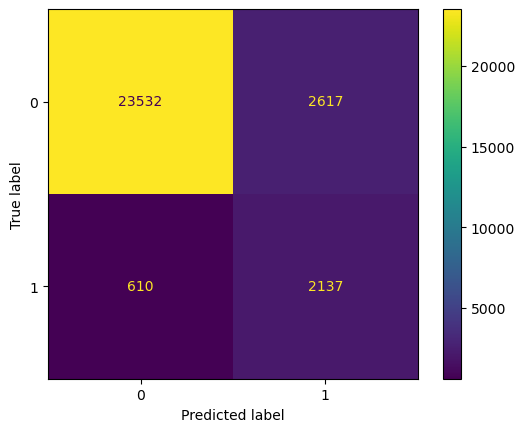

In [76]:
pred_best_xgb_train = best_model_xgboost.predict(X_train)
conf_mat=confusion_matrix(y_train,pred_best_xgb_train)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_train,pred_best_xgb_train))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     11207
           1       0.42      0.72      0.53      1177

    accuracy                           0.88     12384
   macro avg       0.69      0.81      0.73     12384
weighted avg       0.92      0.88      0.89     12384



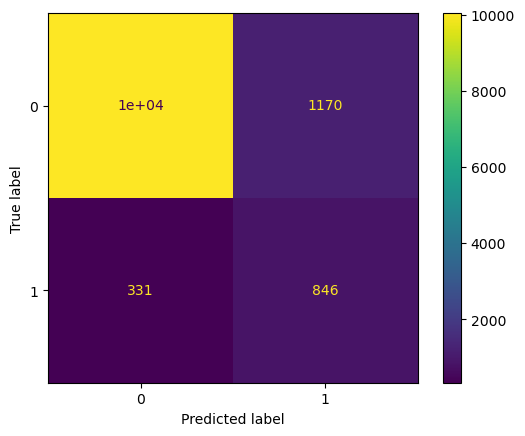

In [77]:
pred_best_xgb_test = best_model_xgboost.predict(X_test)
conf_mat=confusion_matrix(y_test,pred_best_xgb_test)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,pred_best_xgb_test))